# **PROBLEM SOLVING DESIGN**

![Lean StartUp Feedback Loop](../img/project_structure/lean_startup_feedback_loop.jpg)

# **BUSINESS CONTEXT**

## **What is the company?**

Hotmart

## **What is its business model?**

Two-sided marketplace. It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.

## **What is the company stage on the market?**

"Virality" (Lean Analytics) or "early majority" (Innovation Adoption Curve). The company found a pain in the market and validated a product that solves the pain; now is the time to increase the customer base.

# **BUSINESS PROBLEM**

## **What is the business problem the company is facing?**

The company wants to get insight based on customers' data in order to unveil new product opportunities, especially in terms of product success, customer segmentation, and revenue estimation.

## **What is the business solution that this project has to deliver?**

A presentation of storytelling insights based on the available data and, possibly, answers to the following questions:
- Does Hotmart depend on the biggest producers on the platform? That is, the top-selling producers are responsible for most of the
Hotmart billing?
- Are there any relevant patterns or trends in the data?
- It is possible to segment users based on their characteristics (revenue, product niche, etc.)?
- What features most impact the success of a product? that is, the What makes a product sell more?
- It is possible to estimate how much revenue Hotmart will generate in the next three months from the last month shown in the dataset?

**References:**
- Case description
- https://hotmart.com/pt-br

# **SCOPE AND BUSINESS ASSUMPTIONS**

- **Company focus is to scale customer base (not necessarily increase revenue)**
- **When affiliate comission is NaN, assumed to mean zero (0)**


# **SOLUTION STRATEGY**

![IoT method](../img/project_structure/iot_method.png)*IOT (Input-Output-Taks) is a planning strategy to structure a problem solution and make sure it delivers a solution that solves the initial problem.*

### INPUT

- **Business context**:
    - It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.
    - In principle, Hotmart makes money by **taxing**, either the creators or the disseminators, **a percentage of the purchase by the customer**.
- **Business problem**:
    - The company wants to get **insights** based on customers' data in order to **unveil new product opportunities**, especially in terms of product success, customer segmentation, and revenue estimation.
- **Business questions**:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
    - Are there any **relevant patterns or trends** in the data?
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
    - What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
- **Available data**:
    - Data referring to a **sample of purchases made** at Hotmart in 2016. These are more than 1.5 million records of purchases made on our **platform**.

### OUTPUT 

- A presentation of storytelling insights based on the available data and, possibly, answers to the previous questions.

### TASKs

- *QUESTION*:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
        - What are the biggest producers on the platform? What is its definition?
            - Assuming higher than 95th percentile of volume of product sold.
        - What it means to be dependent on some producers?
            - Assuming "Pareto rule" like: 80% of revenue comes from the 5th top selling producers
        - What is the revenue difference from this customers to the remaining one?
            - Compare revenues

<br >

- *QUESTION*:
    - Are there any **relevant patterns or trends** in the data?
        - Check for features (correlation between features, feature distributions and time-changes trends) that shows patterns in terms of customers/producers groups or revenue impact or scaling impact.

<br >

- *QUESTION*:
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
        - What is the purpose of segmenting customers?
          - Find out what are the best customers and what coould be done to change the behaviour of the not-best ones. 
          - Revenue from best customer could support scaling efforts.
        - Check for features that can cluster customer/producers for better revenue undestanding
          - Initially try RFM (Recency-Frequency-Monetary)

<br >      

- *QUESTION*:
    - What **features most impact** the success of a **product**? that is, what makes a **product sell more**?
        - Success of a product = number of products sold
            - Inspect features with high correlation to the number of product sold
            - Inspect feature with high correlation with an increasing trend of products sold
            - Check for simple causal inference techniques
              - knowing features that best impact the product success, we can use this feature for marketing purpose (scalling effort) and, perhaps, get a better overview about what leads to focus on.

<br >

- *QUESTION*:
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

# **PRODUCT BUILDING ROADMAP**

![CRISP-DS Framework](../img/project_structure/crisp_ds.jpg)

---
---
---

# **0 - HELPERS**

## 0.1 - Libraries

*Import required libraries*

In [1]:
# don't cache libraries (especially project library)
%load_ext autoreload
%autoreload 2

In [2]:
# setup and environment
import os
from   pathlib import Path

# save artifacts
import pickle

# data extraction
from sqlalchemy import create_engine

# data manipulation
import numpy  as np
import pandas as pd

# data visualization
import seaborn           as sns
import matplotlib.pyplot as plt
from   matplotlib.axis   import Axis

# statistics
from scipy.stats import mannwhitneyu

# sklearn pipelines
from sklearn.pipeline      import Pipeline, make_pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.compose       import make_column_selector
from sklearn.preprocessing import RobustScaler
from category_encoders     import TargetEncoder
from sklearn               import set_config; 
set_config(display='diagram')

# model tracking
import mlflow

# clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# time series
import pmdarima                    as     pm
from prophet                       import Prophet
from prophet.plot                  import plot_cross_validation_metric
from prophet.diagnostics           import cross_validation, performance_metrics
from statsmodels.tsa.seasonal      import seasonal_decompose
from statsmodels.tsa.stattools     import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model   import ARIMA

# project library
from project_lib.initial_config      import initial_settings
from project_lib.data_description    import (check_dataframe, inspect_dtypes, 
                                             check_na_unique_dtypes, check_dtype_convertion,
                                             summary_statistics, categorical_summary, datetime_summary
                                             )
from project_lib.data_exploration    import (numerical_plot, categorical_plot, datetime_plot,
                                             create_cramer_v_dataframe)
from project_lib.ab_testing          import check_for_bias
from project_lib.clustering_analysis import silhouette_inspection

/home/ds-gustavo-cunha/.pyenv/versions/hotmart_case/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## 0.2 - Functions

*Define functions that will be used on the project*

NOTE: Most functions made for this project are inside the project library. That is, **a package called "project_lib" was created to hold all functions that will be needed for this project.**


For further details, please check the modules inside "project_lib" package [in other words, check .py files inside project_lib folder]

In [3]:
# example of function created for this project
help(check_dataframe)

Help on function check_dataframe in module project_lib.data_description:

check_dataframe(dataframe: pandas.core.frame.DataFrame, summary_stats=False, head: bool = False, size: int = 5) -> None
    It displays the number of NAs, the percentage of NA, the number of unique values and
    the data type for each column.
    
    It can (depending on summary_stats param) also displays dataframe shape and
    also displays statistics for numerical variables.
    
    Finally, it displays the dataframe head or a random sample of dataframe according to user choice.
    
    Args
        dataframe: the pandas dataframe that the user wants to check.
        summary_stats: a boolean to indicate if user wants to see summary statistic
            for numerical features.
        head: boolean that indicate if user wants to see
            the head of the dataframe (True) or
            a sample of the dataframe (False)
        size: size of the dataframe.head() or dataframe.sample() function .
    


## 0.3 - Setup

*Define basic configurations*

In [4]:
# initial setup of dataframes and plots
initial_settings(storytelling=False)

## 0.4 - Constants

*Define reusuable constants*

In [5]:
# define the project root path that will be the "baseline" for all paths in the notebook
PROJECT_ROOT_PATH = Path.cwd().parent
PROJECT_ROOT_PATH

PosixPath('/home/ds-gustavo-cunha/Projects/hotmart_case')

In [6]:
# # variables to connect to data source
# HOST=os.environ["HOST"]
# PORT=os.environ["PORT"]
# USER=os.environ["USER"]
# PASSWORD=os.environ["PASSWORD"]
# SCHEMA=os.environ["SCHEMA"]
# TABLE=os.environ["TABLE"]

# **1 - DATA EXTRACTION**

## 1.1 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to a better data understanding*

In [7]:
# Not available -> datasets are already merged

## 1.2 - Data Fields Description

*Describe available data in regard to database information*


---

Na Hotmart, possuímos três principais personas que integram nosso negócio: os produtores, os afiliados e os compradores.
- Produtores são pessoas que criam produtos digitais na Hotmart, como cursos de idiomas, ebooks de receitas culinárias, audiolivros, softwares, dentre muitos outros exemplos.
- Afiliados são pessoas que promovem produtos dos produtores em troca de uma comissão na venda, que varia de produto para produto, e de afiliado para afiliado.
- Compradores são pessoas que adquirem um ou mais produtos digitais.
    
Uma venda é feita por um afiliado quando alguém clica em um link de afiliados. Eles geralmente fazem a promoção desses produtos em redes sociais, vídeos, anúncios, etc.

Já uma venda é feita por um produtor quando alguém tem acesso direto ao seu produto, sem intermediação do afiliado. Por exemplo, pessoas que seguem o Whindersson Nunes no Youtube e entraram em seu site oficial para adquirir seu produto, ou clicaram no link do produto sem código de afiliação.

---

---

Durante sua avaliação, você irá analisar dados referentes a uma amostra de compras feitas na Hotmart em 2016. Tratam-se de mais de 1,5 milhão registros de compras realizadas em nossa plataforma. Abaixo, nós iremos detalhar o que significa cada campo:
- **purchase_id**: Identificação da compra na Hotmart;
- **product_id**: Identificação do produto na Hotmart;
- **affiliate_id**: Identificação do afiliado na Hotmart;
- **producer_id**: Identificação do produtor na Hotmart;
- **buyer_id**: Identificação do comprador na Hotmart;
- **purchase_date**: Data e hora em que a compra foi realizada;
- **product_creation_date**: Data e hora em que o produto foi criado na Hotmart;
- **product_category**: categoria do produto na Hotmart. Exemplo: e-book, software, curso online, e-tickets, etc.;
- **product_niche**: nicho de mercado que o produto faz parte. Exemplo: educação, saúde e bem-estar, sexualidade, etc.;
- **purchase_value**: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a confidencialidade. O valor apresentado no dataset é o z-score do valor real;
- **affiliate_commission_percentual**: percentual de comissão que o afiliado receberá da compra;
- **purchase_device**: tipo de dispositivo utilizado no momento da compra, como: Desktop, Mobile, Tablet, ou Outros;
- **purchase_origin**: endereço do site do qual a pessoa veio antes da compra. Por exemplo, se uma pessoa veio do Facebook, Youtube, ou até mesmo de outra página no site oficial do produto;
- **is_origin_page_social_network**: informa se essa compra veio de uma URL do Facebook, Youtube, Instagram, Pinterest, ou Twitter.

---

---

Algumas regras de negócio:
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;
- No campo purchase_origin nós apenas consideramos o host do site. Isso quer dizer que, se uma pessoa veio do site www.meuproduto.com/promocoes, esse campo só irá retornar o valor www.meuproduto.com;

---

## 1.3 - Data Loading

*Load data from required files*

In [8]:
# # define connection "endpoint"
# db_connection_str = f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{SCHEMA}'
# # create an engine to connect to database
# db_connection = create_engine(db_connection_str)

# # define query to get data
# query=f"""
# SELECT *
# FROM {TABLE}
# """

# # read all data from database
# df_sql = pd.read_sql(sql=query, con=db_connection)
# df_sql

In [9]:
# # save data to parquet so as to not overload database server unnecessarily
# df_sql.to_parquet(
#     path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
# )

In [10]:
# read data from local source
df_extraction = pd.read_parquet(
    path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
)

# inspect results
df_extraction.sample(5)

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda
1513502,13840450,236941,5183736,5183736,7623774,2016-06-20 21:53:14,2016-06-11 14:21:18,Phisical book,Negotiation,-0.288,0.000,Desktop,Origin 1172,"0,0",1
522327,11907763,189341,2123620,3743891,6710967,2016-03-06 19:53:42,2015-12-02 00:10:58,Phisical book,Negotiation,-0.466,0.000,Desktop,Origin a9c3,"0,0",1
873529,12616202,217783,5238490,5238490,7047161,2016-04-15 23:39:09,2016-04-04 14:52:33,Phisical book,Careers,-0.270,0.000,eReaders,Origin ad34,"0,0",1
177006,11194730,185945,2566662,324713,1449167,2016-01-22 22:22:35,2015-11-16 13:38:28,Podcast,Anxiety management,-0.350,50.000,eReaders,Origin 7f7e,"0,0",1
209273,11260147,167328,3992235,3992235,5849672,2016-01-26 17:40:41,2015-08-11 12:53:41,Phisical book,Immigration,-0.354,0.000,Smart TV,Origin ef2b,"0,0",1


# **2 - DATA DESCRIPTION**

## 2.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [11]:
# create a restore point of the previous section
df_description = df_extraction.copy()

# check dataframe for this new section
check_dataframe( dataframe=df_description, summary_stats=True, head=True )

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,purchase_id,"12.445.456,601","12.468.487,500","917.581,737","1.579.356,500","1.663.958,000","14.357.203,000","12.693.245,000","-0,090","-0,756"
1,product_id,"148.595,814","154.310,000","55.543,152","81.796,000","4,000","319.129,000","319.125,000","-0,482","-0,702"
2,affiliate_id,"2.297.500,688","1.690.428,000","2.092.655,502","3.549.994,000","3,000","7.700.836,000","7.700.833,000","0,651","-0,823"
3,producer_id,"2.164.479,522","1.377.289,000","2.038.959,782","3.366.648,000","3,000","9.868.481,000","9.868.478,000","0,724","-0,699"
4,buyer_id,"5.187.551,341","5.999.153,500","2.199.255,869","3.216.124,250","60,000","12.014.792,000","12.014.732,000","-0,878","-0,492"
5,purchase_value,"0,000","-0,350","1,000","0,518","-0,541","124,561","125,102","10,817","629,206"
6,affiliate_commission_percentual,"7,596","0,000","18,477","0,000","0,000","100,000","100,000","2,259","3,753"
7,Venda,"1,000","1,000","0,000","0,000","1,000","1,000","0,000","0,000","0,000"


-----------------------------


dataframe.head(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda
0,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.3,NaN,Smart TV,Origin ef2b,"0,0",1
1,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.2,NaN,Smart TV,Origin ef2b,"0,0",1
2,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.5,NaN,Smart TV,Origin ef2b,"0,0",1
3,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.4,NaN,Smart TV,Origin ef2b,"0,0",1
4,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.5,NaN,Smart TV,Origin ef2b,"0,0",1


*************************************************


In [12]:
# delete previous section dataframe to save memory
lst = [df_extraction]
del lst
del df_extraction

## 2.2 - Rename Columns

*Search for misleading or error-prone column names*

In [13]:
# inspect column names
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'Venda'],
      dtype='object')

In [14]:
# lower the case of venda column
df_description = df_description.rename(columns={"Venda": "sell"})

# inspect results
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'sell'],
      dtype='object')

## 2.3 - Check Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [15]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 1,599,828 rows and 15 columns


## 2.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [16]:
# define shape before dtype convertion
shape_before = df_description.shape

# inspect dataframe types
inspect_dtypes(df_description, 15)

,types,random row: 1,random row: 2,random row: 3,random row: 4,random row: 5,random row: 6,random row: 7,random row: 8,random row: 9,random row: 10,random row: 11,random row: 12,random row: 13,random row: 14,random row: 15
purchase_id,int64,11.081.541,12.014.552,13.701.727,13.788.322,11.868.928,12.239.238,11.065.056,13.716.892,12.543.721,12.078.565,13.592.079,13.420.030,11.984.758,12.306.852,13.908.839
product_id,int64,157.740,89.321,56.996,215.256,207.918,168.608,148.977,85.986,187.765,165.439,209.644,232.626,208.553,206.460,222.755
affiliate_id,int64,4.831.032,2.510.048,483.651,401.237,367.278,3.630.929,4.971.684,360.854,3.451.445,3.287.637,2.535.341,483.651,3.717.169,16.557,2.490.243
producer_id,int64,4.831.032,2.510.048,369.756,401.237,367.278,3.630.929,935.401,34.602,3.451.445,1.570.132,2.535.341,4.450.416,3.717.169,995.328,2.490.243
buyer_id,int64,6.025.821,5.880.150,1.991.312,7.600.008,1.506.537,1.923.001,4.504.696,3.034.482,306.103,6.828.627,7.507.541,2.292.079,6.747.355,3.420.893,5.145.720
purchase_date,datetime64[ns],2016-01-16 13:16:15,2016-03-12 16:53:14,2016-06-13 17:11:27,2016-06-18 14:47:23,2016-03-05 11:04:24,2016-03-24 20:15:22,2016-01-15 17:35:54,2016-06-14 13:11:30,2016-04-11 17:11:05,2016-03-15 14:38:24,2016-06-08 00:11:04,2016-05-30 01:00:17,2016-03-10 22:55:32,2016-03-28 18:08:16,2016-06-25 01:53:05
product_creation_date,datetime64[ns],2015-06-19 16:52:11,2014-03-03 22:22:19,2013-04-23 11:04:45,2016-03-26 18:23:54,2016-02-27 17:05:54,2015-08-18 14:41:40,2015-04-29 04:34:12,2014-02-17 14:25:28,2015-11-24 17:21:34,2015-08-01 10:48:25,2016-03-06 01:43:39,2016-05-28 17:05:14,2016-03-01 17:16:41,2016-02-21 14:08:41,2016-04-22 22:02:37
product_category,object,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book,Phisical book
product_niche,object,Anxiety management,Presentation skills,Online course creation,Anxiety management,Government,Negotiation,Immigration,Anxiety management,Presentation skills,Presentation skills,Teaching English,Disease,Economics,Economics,Negotiation
purchase_value,float64,"-0,128","-0,523","-0,391","-0,485","1,233","-0,504","1,424","-0,504","-0,539","-0,502","1,434","-0,211","0,093","0,767","0,001"


In [17]:
# inspect basic column descriptions
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 



In [18]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [19]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['is_origin_page_social_network'].tolist())}"
)

# convert column is_origin_page_social_network to boolean
df_description["is_origin_page_social_network"] = df_description["is_origin_page_social_network"].apply( lambda x: True if x == '0,0' else False if x == '1,0' else "NaN")

# print report
print(
    f"Unique values in colum 'sell' after transformation: {set(df_description['is_origin_page_social_network'].tolist())}"
)

Unique values in colum 'sell': {'1,0', '0,0'}
Unique values in colum 'sell' after transformation: {False, True}


In [20]:
# sanity check
assert df_description.shape == shape_before, "Data was missed during dtype convertion"

## 2.5 - Data Validation

*Check if columns make sense in regard to business understanding*

In [21]:
# as data was already made available to us 
# and there is no way to validate data source,
# no need for data validation right now.

## 2.6 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [22]:
# define dataframe grain
grain = ["purchase_id"]

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df_description.duplicated(keep=False).sum():,} '
    f'duplicated rows [{df_description.duplicated(keep=False).mean()*100:.2f}%] based on all columns. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'Dataframe granularity: {grain}\n\n'
    f'There are {df_description.duplicated(subset=grain, keep=False).sum():,} duplicated rows '
    f'[{df_description.duplicated(subset=grain, keep=False).mean()*100:.2f}%] based on table granularity. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 0 duplicated rows [0.00%] based on all columns. Duplicated rows are double counted.

*************************************************

Dataframe granularity: ['purchase_id']

There are 0 duplicated rows [0.00%] based on table granularity. Duplicated rows are double counted.

*************************************************


## 2.7 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [23]:
#  get number of NA, percent of NA, number of unique and column type
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 



In [24]:
# print report
print(
    f'affiliate_commission_percentual\n'
    f'\tmax value {df_description["affiliate_commission_percentual"].max(skipna=True)}\n'
    f'\tmin value {df_description["affiliate_commission_percentual"].min(skipna=True)}'
)

affiliate_commission_percentual
	max value 100.0
	min value 0.0


## 2.8 - Handle Missing Values

*Handle missing value for columns*

**Business rule**
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;

In [25]:
# inspect rows where affiliate_commission_percentual is NaN to validate business rule
df_description.loc[
    df_description["affiliate_commission_percentual"].isna(),
    ["affiliate_commission_percentual", "affiliate_id", "producer_id"]    
].sample(5, random_state=7)

,affiliate_commission_percentual,affiliate_id,producer_id
85,NaN,213339,213339
106,NaN,195000,195000
22,NaN,431496,298517
11,NaN,618642,618642
65,NaN,8716,361052


In [26]:
# as NaNs in affiliate_commission_percentual don't seem to be due to business rule,
# let's fill NaN with 0
df_description["affiliate_commission_percentual"] = df_description["affiliate_commission_percentual"].fillna(value=0)

# inspect dataframe after operation
check_na_unique_dtypes(df_description[["affiliate_commission_percentual"]]);

*************************************************
Dataframe size in memory: 12.799 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
affiliate_commission_percentual,0,0,279,float64


-----------------------------

 Dataframe shape is (1599828, 1) 



## 2.9 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [27]:
# split dataset into types of features
df_number = df_description.select_dtypes(include=["number", "bool"])
df_date = df_description.select_dtypes(include=["datetime"])
df_string = df_description.select_dtypes(include=["object"])

# sanity check
assert df_number.shape[1] + df_date.shape[1] + df_string.shape[1] == df_description.shape[1], """Revise the previous split, something may be wrong!"""

### 2.9.1 - Numerical Variables

*Inspect numerical variables*

In [28]:
# check summary statistics
summary_statistics(df_number)

# delete previous dataframe to save memory
lst = [df_number]
del lst
del df_number



Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,purchase_id,"12.445.456,601","12.468.487,500","917.581,737","1.579.356,500","1.663.958,000","14.357.203,000","12.693.245,000","-0,090","-0,756"
1,product_id,"148.595,814","154.310,000","55.543,152","81.796,000","4,000","319.129,000","319.125,000","-0,482","-0,702"
2,affiliate_id,"2.297.500,688","1.690.428,000","2.092.655,502","3.549.994,000","3,000","7.700.836,000","7.700.833,000","0,651","-0,823"
3,producer_id,"2.164.479,522","1.377.289,000","2.038.959,782","3.366.648,000","3,000","9.868.481,000","9.868.478,000","0,724","-0,699"
4,buyer_id,"5.187.551,341","5.999.153,500","2.199.255,869","3.216.124,250","60,000","12.014.792,000","12.014.732,000","-0,878","-0,492"
5,purchase_value,"0,000","-0,350","1,000","0,518","-0,541","124,561","125,102","10,817","629,206"
6,affiliate_commission_percentual,"7,595","0,000","18,476","0,000","0,000","100,000","100,000","2,259","3,754"
7,sell,"1,000","1,000","0,000","0,000","1,000","1,000","0,000","0,000","0,000"


**According to business rule**:
- purchase_value: "valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real";
  - So **it is fine to have negative values**!

### 2.9.2 - Categorical Variables

*Inspect categorical variables*

In [29]:
# check overview of categorical features
categorical_summary(df_string, nunique_threshold=30, unique_name_len_threshold=50)

# delete previous dataframe to save memory
lst = [df_string]
del lst
del df_string

Overview of string columns:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_device,0,0,5,object
purchase_origin,0,0,9.603,object


------------------------------------------------- 

---> The unique values for product_category column are: [values are truncated] 

['Video', 'Podcast', 'Phisical book', 'eBook', 'In-class course', 'Workshop', 'Webinar', 'eTicket', 'Subscription', 'App']
------------------------------------------------- 

---> The unique values for product_niche column are: [values are truncated] 

['Presentation skills', 'Child psychology', 'Anxiety management', 'Teaching English', 'Online course creation', 'Media training', 'Storytelling', 'YouTube video creation', 'Procrastination', 'Organization', 'Negotiation', 'Careers', 'Personal finance', 'Filmmaking', 'Government', 'Global diplomacy', 'Immigration', 'Economics', 'Accounting', 'Biology', 'Physics', 'Genetics', 'Disease', 'Thermodynamics', 'Travel hacking']
------------------------------------------------- 

---> The unique values for purchase_device column are: [values are truncated] 

['Smart TV', 'Tablet', 'Desktop', 'eReaders', 'Cellphone']

### 2.9.3 - Datetime Variables

*Inspect datetime variables*

In [30]:
# check an overview of datetime features
datetime_summary(df_date)

# delete previous dataframe to save memory
lst = [df_date]
del lst
del df_date

,first date,last date,range [months],mean,median,Num NAs,Percent NAs,count [non-NA],nunique
purchase_date,2016-01-01 00:00:27,2016-06-30 23:59:57,6,2016-04-04 18:39:34.511339776,2016-04-07 18:50:16.500000,0,0,1.599.828,1.488.964
product_creation_date,2008-10-27 01:39:34,2016-12-31 13:43:50,99,2015-02-22 14:52:58.141221376,2015-05-31 00:12:18,0,0,1.599.828,17.879


### 2.9.4 - Investigate further:

*Variables to inspect the real meaning*

In [31]:
# None up to this point

# **3 - FEATURE ENGINEERING**

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [32]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
check_dataframe( df_f_eng )

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


dataframe.sample(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,sell
971799,12807945,42903,1656555,442241,80776,2016-04-26 15:05:12,2012-09-26 15:54:59,Phisical book,YouTube video creation,1.6,0.0,Smart TV,Origin ef2b,True,1
46077,10933594,153413,34224,4710741,5957603,2016-01-07 15:04:40,2015-05-25 18:01:36,Phisical book,Negotiation,-0.4,50.0,Desktop,Origin adf4,True,1
646508,12157848,31939,294500,294500,6829583,2016-03-20 11:01:46,2012-04-21 15:47:04,Phisical book,Negotiation,3.2,0.0,Desktop,Origin c150,True,1
931960,12729832,130315,906263,906263,5671669,2016-04-22 13:15:36,2014-12-29 15:01:10,Phisical book,Anxiety management,-0.5,0.0,Smart TV,Origin ef2b,True,1
1203693,13240334,229431,2546880,2546880,1945315,2016-05-19 04:37:39,2016-05-16 21:30:09,Podcast,Personal finance,-0.5,0.0,eReaders,Origin ecf4,True,1


*************************************************


In [33]:
# delete previous section dataframe to save memory
lst = [df_description]
del lst
del df_description

## 3.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

**HYPOTHESIS MIND MAP**

![Business hypothesis mindmap](../img/project_structure/xxx.jpg)

*The above image is the product of a brainstorm that took into consideration many different variables that can impact the main business metric. This mind map is a great help when trying to raise hypotheses that could lead to insights. It is also helpful to guide feature engineering (create new relevant features) and when there is a need to look for more data elsewhere.*

> *Taking into consideration hypothesis mind map (at the beginning of this notebook) and the business case questions:*


**H1**. Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?

**H2**. Are there any **relevant patterns or trends** in the data?

**H3**. It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?

**H4**. What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?

**H5**. It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?


## 3.3 - Feature Creation

*Create new features (columns) that can be meaningful for EDA and, especially, machine learning modelling.*

### product_age_when_purchased

In [34]:
# create a column to indicate what is the age of the product when it was purchased
# purchase_date - product_creation_date in months
# month = 0 ---> purchased on the month of creation
df_f_eng["product_age_when_purchased"] = df_f_eng["purchase_date"].dt.to_period(freq="M") - df_f_eng["product_creation_date"].dt.to_period(freq="M")
# extract the month information
df_f_eng["product_age_when_purchased"] = df_f_eng["product_age_when_purchased"].apply(lambda x: x.n)

# inspect result
df_f_eng[["product_creation_date", "purchase_date", "product_age_when_purchased"]].sample(10, random_state=7)

,product_creation_date,purchase_date,product_age_when_purchased
687286,2015-12-01 12:37:00,2016-03-24 20:01:35,3
307154,2016-01-27 22:56:37,2016-02-08 01:28:05,1
94908,2015-01-10 15:32:09,2016-01-13 13:48:37,12
309710,2013-01-14 13:17:37,2016-02-08 13:19:27,37
1074287,2015-12-27 13:17:06,2016-05-06 12:38:26,5
1398614,2016-04-11 13:35:45,2016-06-09 12:45:41,2
1587844,2015-11-06 23:59:53,2016-06-29 12:32:21,7
1184721,2016-04-14 21:41:31,2016-05-17 02:28:10,1
514906,2016-02-12 14:33:39,2016-03-06 01:52:02,1
810722,2016-02-21 18:28:50,2016-04-09 11:46:53,2


### binned_affiliate_commission_percentual

In [35]:
# check numerical stats for affiliate_commission_percentual and product_age_when_purchased
summary_statistics(df_f_eng[["affiliate_commission_percentual", "product_age_when_purchased"]])



Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,affiliate_commission_percentual,"7,595","0,000","18,476","0,000","0,000","100,000","100,000","2,259","3,754"
1,product_age_when_purchased,"13,416","10,000","12,933","17,000","-6,000","91,000","97,000","1,277","1,555"


In [36]:
# defiene bins to discretize affiliate_commission_percentual
bins = [-1] + [*range(0, 111, 10)] 
print(f"Chosen bins: {bins}")

# create a new column with discretized affiliate_commission_percentual
df_f_eng["binned_affiliate_commission_percentual"] = pd.cut(x=df_f_eng["affiliate_commission_percentual"], 
       bins=bins, right=False, retbins=False, include_lowest=True, ordered=True)

# inspect results
df_f_eng[["affiliate_commission_percentual", "binned_affiliate_commission_percentual"]].sample(10, random_state=14)

Chosen bins: [-1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


,affiliate_commission_percentual,binned_affiliate_commission_percentual
1217024,0.0,"[0, 10)"
479333,0.0,"[0, 10)"
1417890,50.0,"[50, 60)"
1096048,0.0,"[0, 10)"
63787,0.0,"[0, 10)"
844732,50.0,"[50, 60)"
464067,60.0,"[60, 70)"
253831,0.0,"[0, 10)"
343993,0.0,"[0, 10)"
283460,50.0,"[50, 60)"


### binned_product_age_when_purchased

In [37]:
# defiene bins to discretize product_age_when_purchased
bins = [*range(0, 110, 10)] 
print(f"Chosen bins: {bins}")

# create a new column with discretized product_age_when_purchased
df_f_eng["binned_product_age_when_purchased"] = pd.cut(x=df_f_eng["product_age_when_purchased"], 
       bins=bins, right=False, include_lowest=True,
       retbins=False, 
       ordered=True,
       )

# inspect results
df_f_eng[["product_age_when_purchased", "binned_product_age_when_purchased"]].sample(10, random_state=14)

Chosen bins: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


,product_age_when_purchased,binned_product_age_when_purchased
1217024,20,"[20, 30)"
479333,5,"[0, 10)"
1417890,7,"[0, 10)"
1096048,2,"[0, 10)"
63787,26,"[20, 30)"
844732,16,"[10, 20)"
464067,25,"[20, 30)"
253831,15,"[10, 20)"
343993,41,"[40, 50)"
283460,21,"[20, 30)"


### purchase_date_daily

In [38]:
# convert purchase_date to daily frequency and keep it as datetime format
df_f_eng["purchase_date_daily"] = df_f_eng["purchase_date"].dt.strftime('%Y-%m-%d')
df_f_eng["purchase_date_daily"] = pd.to_datetime(df_f_eng["purchase_date_daily"], format='%Y-%m-%d')

# inspect results
display(
    df_f_eng[["purchase_date", "purchase_date_daily"]].dtypes,
    df_f_eng[["purchase_date", "purchase_date_daily"]].sample(10, random_state=7)
)

purchase_date          datetime64[ns]
purchase_date_daily    datetime64[ns]
Length: 2, dtype: object

,purchase_date,purchase_date_daily
687286,2016-03-24 20:01:35,2016-03-24
307154,2016-02-08 01:28:05,2016-02-08
94908,2016-01-13 13:48:37,2016-01-13
309710,2016-02-08 13:19:27,2016-02-08
1074287,2016-05-06 12:38:26,2016-05-06
1398614,2016-06-09 12:45:41,2016-06-09
1587844,2016-06-29 12:32:21,2016-06-29
1184721,2016-05-17 02:28:10,2016-05-17
514906,2016-03-06 01:52:02,2016-03-06
810722,2016-04-09 11:46:53,2016-04-09


# **4 - DATA FILTERING**

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [39]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng.copy()

# check dataframe
check_dataframe( df_filter, summary_stats=True )

*************************************************
Dataframe size in memory: 595.112 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 19) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,purchase_id,"12.445.456,601","12.468.487,500","917.581,737","1.579.356,500","1.663.958,000","14.357.203,000","12.693.245,000","-0,090","-0,756"
1,product_id,"148.595,814","154.310,000","55.543,152","81.796,000","4,000","319.129,000","319.125,000","-0,482","-0,702"
2,affiliate_id,"2.297.500,688","1.690.428,000","2.092.655,502","3.549.994,000","3,000","7.700.836,000","7.700.833,000","0,651","-0,823"
3,producer_id,"2.164.479,522","1.377.289,000","2.038.959,782","3.366.648,000","3,000","9.868.481,000","9.868.478,000","0,724","-0,699"
4,buyer_id,"5.187.551,341","5.999.153,500","2.199.255,869","3.216.124,250","60,000","12.014.792,000","12.014.732,000","-0,878","-0,492"
5,purchase_value,"0,000","-0,350","1,000","0,518","-0,541","124,561","125,102","10,817","629,206"
6,affiliate_commission_percentual,"7,595","0,000","18,476","0,000","0,000","100,000","100,000","2,259","3,754"
7,sell,"1,000","1,000","0,000","0,000","1,000","1,000","0,000","0,000","0,000"
8,product_age_when_purchased,"13,416","10,000","12,933","17,000","-6,000","91,000","97,000","1,277","1,555"


-----------------------------


dataframe.sample(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,sell,product_age_when_purchased,binned_affiliate_commission_percentual,binned_product_age_when_purchased,purchase_date_daily
11739,10862975,109833,3256650,3256650,5926903,2016-01-02 22:23:40,2014-07-21 11:39:18,Phisical book,Anxiety management,0.2,0.0,eReaders,Origin 4deb,True,1,18,"[0, 10)","[10, 20)",2016-01-02
570570,12006246,207867,4744239,4744239,6758019,2016-03-12 12:35:01,2016-02-27 14:03:08,Phisical book,Accounting,2.1,0.0,Desktop,Origin 6f1a,True,1,1,"[0, 10)","[0, 10)",2016-03-12
1119254,13081726,43656,549368,549368,5933695,2016-05-10 14:17:54,2012-10-08 14:50:34,Phisical book,Presentation skills,0.3,0.0,Desktop,Origin 08a4,True,1,43,"[0, 10)","[40, 50)",2016-05-10
1205896,13244824,214300,233641,233641,7346968,2016-05-19 15:14:45,2016-03-22 17:04:54,Phisical book,Anxiety management,0.4,0.0,eReaders,Origin 293e,True,1,2,"[0, 10)","[0, 10)",2016-05-19
253378,11350032,152018,717015,717015,3916309,2016-02-01 10:20:55,2015-05-17 18:02:25,Phisical book,Online course creation,-0.3,0.0,Desktop,Origin 137e,True,1,9,"[0, 10)","[0, 10)",2016-02-01


*************************************************


In [40]:
# delete previous section dataframe to save memory
lst = [df_f_eng]
del lst
del df_f_eng

## 4.2 Rows Filtering

*Remove rows with meaningless (or unimportant) data*

### purchase_value column

**According to business rule**:
- purchase_value: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real;
    - So **it is fine to have negative values**! ---> **no need to filter rows**!

### product_age_when_purchased column

In [41]:
# check negative product_age_when_purchased
df_filter[df_filter["product_age_when_purchased"] < 0]

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,sell,product_age_when_purchased,binned_affiliate_commission_percentual,binned_product_age_when_purchased,purchase_date_daily
1394257,13609042,319129,1738263,9868481,7049073,2016-06-08 19:41:27,2016-12-31 13:43:50,Phisical book,Negotiation,3.4,20.0,Desktop,Origin 5187,True,1,-6,"[20, 30)",NaN,2016-06-08
1438238,13692956,319129,599274,9868481,4450488,2016-06-13 05:57:13,2016-12-31 13:43:50,Phisical book,Negotiation,3.5,30.0,Desktop,Origin 6c05,True,1,-6,"[30, 40)",NaN,2016-06-13


In [42]:
# define shape before filtering data
shape_before = df_filter.shape

# it order to avoid misleading data (product was sold before being created)
# we will remove these rows
df_filter = df_filter[df_filter["product_age_when_purchased"] >= 0]

# sanity check
assert (
    df_filter.shape[0] == shape_before[0] - 2
) & (
    df_filter.shape[1] == shape_before[1]
), "Misleading rows filtering!"

## 4.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

### sell column

In [43]:
# TO-DO
# print report
print(
    f"Unique values in colum 'sell': {set(df_filter['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [44]:
# define shape before filtering data
shape_before = df_filter.shape

# column sell is a constant column ---> remove it
df_filter = df_filter.drop(columns=["sell"])

# sanity check
# sanity check
assert (
    df_filter.shape[0] == shape_before[0]
) & (
    df_filter.shape[1] == shape_before[1] - 1
), "Misleading columns filtering!"

### purchase origin

In [45]:
# inspect column
check_na_unique_dtypes(df_filter[["purchase_origin"]]);

*************************************************
Dataframe size in memory: 121.587 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_origin,0,0,9.603,object


-----------------------------

 Dataframe shape is (1599826, 1) 



*Purchase origin is a categorical column with more than 9.000 unique values. So, it would be quite complex to analyse this feature at this point of the project. Then, we decided to remove this column for this project cycle*

In [46]:
# define shape before filtering data
shape_before = df_filter.shape

# remove column
df_filter = df_filter.drop(columns=["purchase_origin"])

# sanity check
# sanity check
assert (
    df_filter.shape[0] == shape_before[0]
) & (
    df_filter.shape[1] == shape_before[1] - 1
), "Misleading columns filtering!"

# **5 - EXPLORATORY DATA ANALYSIS**

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [47]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
check_dataframe( df_eda )

*************************************************
Dataframe size in memory: 486.323 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.826,int64
product_id,0,0,17.882,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.019,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.962,datetime64[ns]
product_creation_date,0,0,17.878,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599826, 17) 

-----------------------------


dataframe.sample(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,is_origin_page_social_network,product_age_when_purchased,binned_affiliate_commission_percentual,binned_product_age_when_purchased,purchase_date_daily
551518,11966144,125579,802624,802624,3067542,2016-03-09 18:45:12,2014-11-24 11:04:35,Phisical book,Negotiation,-0.4,0.0,Smart TV,True,16,"[0, 10)","[10, 20)",2016-03-09
1462711,13740864,143367,216381,216381,7580195,2016-06-15 14:52:55,2015-03-24 17:21:19,Phisical book,Anxiety management,0.3,0.0,Desktop,True,15,"[0, 10)","[10, 20)",2016-06-15
978363,12820786,208224,349701,349701,5949377,2016-04-27 03:12:46,2016-02-28 17:09:07,Phisical book,Anxiety management,0.1,0.0,eReaders,True,2,"[0, 10)","[0, 10)",2016-04-27
547483,11957904,157740,4831032,4831032,5976335,2016-03-09 12:11:15,2015-06-19 16:52:11,Phisical book,Anxiety management,-0.4,0.0,Smart TV,True,9,"[0, 10)","[0, 10)",2016-03-09
43152,10927169,132273,4057408,4057408,5954958,2016-01-07 00:26:28,2015-01-12 15:15:55,Phisical book,YouTube video creation,-0.5,0.0,Cellphone,True,12,"[0, 10)","[10, 20)",2016-01-07


*************************************************


In [48]:
# delete previous section dataframe to save memory
lst = [df_filter]
del lst
del df_filter

## 5.2 - Univariate Analysis

*Explore variables distributions*

In [49]:
# split dataset into types of features
df_eda_num = df_eda.select_dtypes(include=["number", "bool"])
df_eda_date = df_eda.select_dtypes(include=["datetime"])
df_eda_str = df_eda.select_dtypes(include=["object", "category"])

# sanity check
assert df_eda_num.shape[1] + df_eda_date.shape[1] + df_eda_str.shape[1] == df_eda.shape[1], """Revise the previous split, something may be wrong!"""

### 5.2.1 - Numerical Columns

In [50]:
# define categorical figure path
numerical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_cols", "numerical_fatures_eda.png")

# # plot numerical columns for base data
# numerical_plot(
#     dataframe=df_eda_num, 
#     n_cols=3,
#     hist=False,
#     save_fig=numerical_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_num]
del lst
del df_eda_num

![Numerical Univariate EDA](../img/data_exploration/numerical_cols/numerical_fatures_eda.png)

### 5.2.2 - Categorical Columns

In [51]:
# define categorical figure path
categorical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "categorical_cols", "categorical_fatures_eda.png")

# # plot categorical columns for base data
# categorical_plot(
#     dataframe=df_eda_str,
#     max_num_cat=10,
#     n_cols=3,
#     trunc_label=20,
#     save_fig=categorical_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_str]
del lst
del df_eda_str

![Categorical Univariate EDA](../img/data_exploration/categorical_cols/categorical_fatures_eda.png)

### 5.2.3 Datetime Columns

In [52]:
# define datetime figure path
datetime_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "datetime_cols", "datetime_fatures_eda.png")

# # plot datetime columns for base data
# datetime_plot(
#     dataframe=df_eda_date,
#     n_cols=3,
#     save_fig=datetime_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_date]
del lst
del df_eda_date

![Datetime Univariate EDA](../img/data_exploration/datetime_cols/datetime_fatures_eda.png)

## 5.3 - Bivariate Analysis

*Explore relationship between variables (in pairs)*

### 5.3.1 - Numerical variables

In [53]:
# define pairplot figure path
pairplot_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_corr", "pairplot_eda.png")

# # plot pairplot
# # don't consider id columns -> make no sense as they are "random"
# g = sns.pairplot( df_eda[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].sample(100_000), diag_kind="kde", corner=False )
# # define plot details
# for ax in g.axes.flatten():
#     # rotate x axis labels
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     # rotate y axis labels
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     # set y labels alignment
#     ax.yaxis.get_label().set_horizontalalignment('right')

# # save figure
# plt.savefig(pairplot_fig_path, facecolor="white", bbox_inches="tight");        

![Pairplot EDA](../img/data_exploration/numerical_corr/pairplot_eda.png)

In [54]:
# define pairplot figure path
spearman_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_corr", "spearman_corr_eda.png")

# # calculate pearson correlation coefficient
# # don't consider id columns -> make no sense as they are "random"
# correlation = df_eda_num[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].corr( method = 'spearman' )

# # display heatmap of correlation on figure
# sns.heatmap( correlation, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(spearman_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/numerical_corr/spearman_corr_eda.png)

### 5.3.2 - Categorical variables

In [55]:
# # create a dataframe with cramer-v for every row-column pair
# cramer_v_corr = create_cramer_v_dataframe( df_eda[["product_category", "product_niche", "purchase_device"]] )

# # inspect results
# cramer_v_corr

In [56]:
# define pairplot figure path
cramer_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "categorical_corr", "cramer_corr_eda.png")

# # display heatmap of correlation on figure
# sns.heatmap( cramer_v_corr, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(cramer_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/categorical_corr/cramer_corr_eda.png)

### 5.3.3 - Correlation with target variable

In [57]:
# check available columns
df_eda.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'is_origin_page_social_network',
       'product_age_when_purchased', 'binned_affiliate_commission_percentual',
       'binned_product_age_when_purchased', 'purchase_date_daily'],
      dtype='object')

In [58]:
# # iterate over columns to check for correlation with target variable
# for col in ['purchase_date', 'product_creation_date', 
#             'product_category', 
#             'product_niche', 
#             'affiliate_commission_percentual', 'purchase_device', 
#             'is_origin_page_social_network',
#             'product_age_when_purchased']:
#     # inspect correlation
#     check_for_bias(
#         dataframe=df_eda[[col, 'purchase_value']].sample(100_000),
#         treatment="purchase_value",
#         showfliers=False,
#         figsize=(30, 6),
#         num_cols=3,
#         saving_path=os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "target_corr", f"{col}_vs_purchase_value_eda.png")
#     );

![Feature vs Target EDA](../img/data_exploration/target_corr/product_category_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/product_niche_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/purchase_device_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/affiliate_commission_percentual_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/product_age_when_purchased_vs_purchase_value_eda.png)

# **6 - BUSINESS HYPOTHESIS**

*Validate all business hypothesis based on available data*

## **H1.** Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
        - What are the biggest producers on the platform? What is its definition?
            - Assuming higher than 95th percentile of volume of product sold.
        - What it means to be dependent on some producers?
            - Assuming "Pareto rule" like: 80% of revenue comes from the 5th top selling producers
        - What is the revenue difference from this customers to the remaining one?
            - Compare revenues


In [59]:
# inspect available dataframe
df_eda.sample(3)

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,is_origin_page_social_network,product_age_when_purchased,binned_affiliate_commission_percentual,binned_product_age_when_purchased,purchase_date_daily
1245157,13320126,189997,4554369,4554369,7245571,2016-05-24 00:18:15,2015-12-05 17:54:36,Phisical book,Negotiation,0.1,0.0,Desktop,True,5,"[0, 10)","[0, 10)",2016-05-24
478098,11815593,162169,349701,349701,4503543,2016-03-01 20:18:19,2015-07-13 20:39:22,Phisical book,Anxiety management,0.1,0.0,eReaders,True,8,"[0, 10)","[0, 10)",2016-03-01
1215106,13263241,88450,289832,289832,6062379,2016-05-20 20:16:16,2014-02-28 23:43:21,Phisical book,Physics,-0.5,0.0,Smart TV,True,27,"[0, 10)","[20, 30)",2016-05-20


In [60]:
# get total purchases per producer
df_producer_purchases = df_eda.groupby(by="producer_id", as_index=False).agg(
    mean_purchase_value = ("purchase_value", "mean"),
    nunique_purchase_id = ("purchase_id", "nunique"),
    nunique_buyer_id = ("buyer_id", "nunique"),
    )

# inspect results
check_dataframe(df_producer_purchases, summary_stats=True, size=3)

*************************************************
Dataframe size in memory: 0.257 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
producer_id,0,0,8.019,int64
mean_purchase_value,0,0,6.321,float64
nunique_purchase_id,0,0,887,int64
nunique_buyer_id,0,0,826,int64


-----------------------------

 Dataframe shape is (8019, 4) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,producer_id,"3.093.824,777","2.981.724,000","2.214.529,095","4.000.744,500","3,000","7.631.606,000","7.631.603,000","0,229","-1,217"
1,mean_purchase_value,"-0,036","-0,351","0,940","0,521","-0,541","29,859","30,400","10,669","251,012"
2,nunique_purchase_id,"199,504","9,000","1.252,749","50,000","1,000","41.220,000","41.219,000","19,737","510,723"
3,nunique_buyer_id,"155,266","8,000","870,183","43,000","1,000","30.063,000","30.062,000","17,789","442,564"


-----------------------------


dataframe.sample(3)


,producer_id,mean_purchase_value,nunique_purchase_id,nunique_buyer_id
4483,3462728,0.0,4,4
3550,2480721,-0.5,185,146
4161,3122724,-0.5,2,2


*************************************************


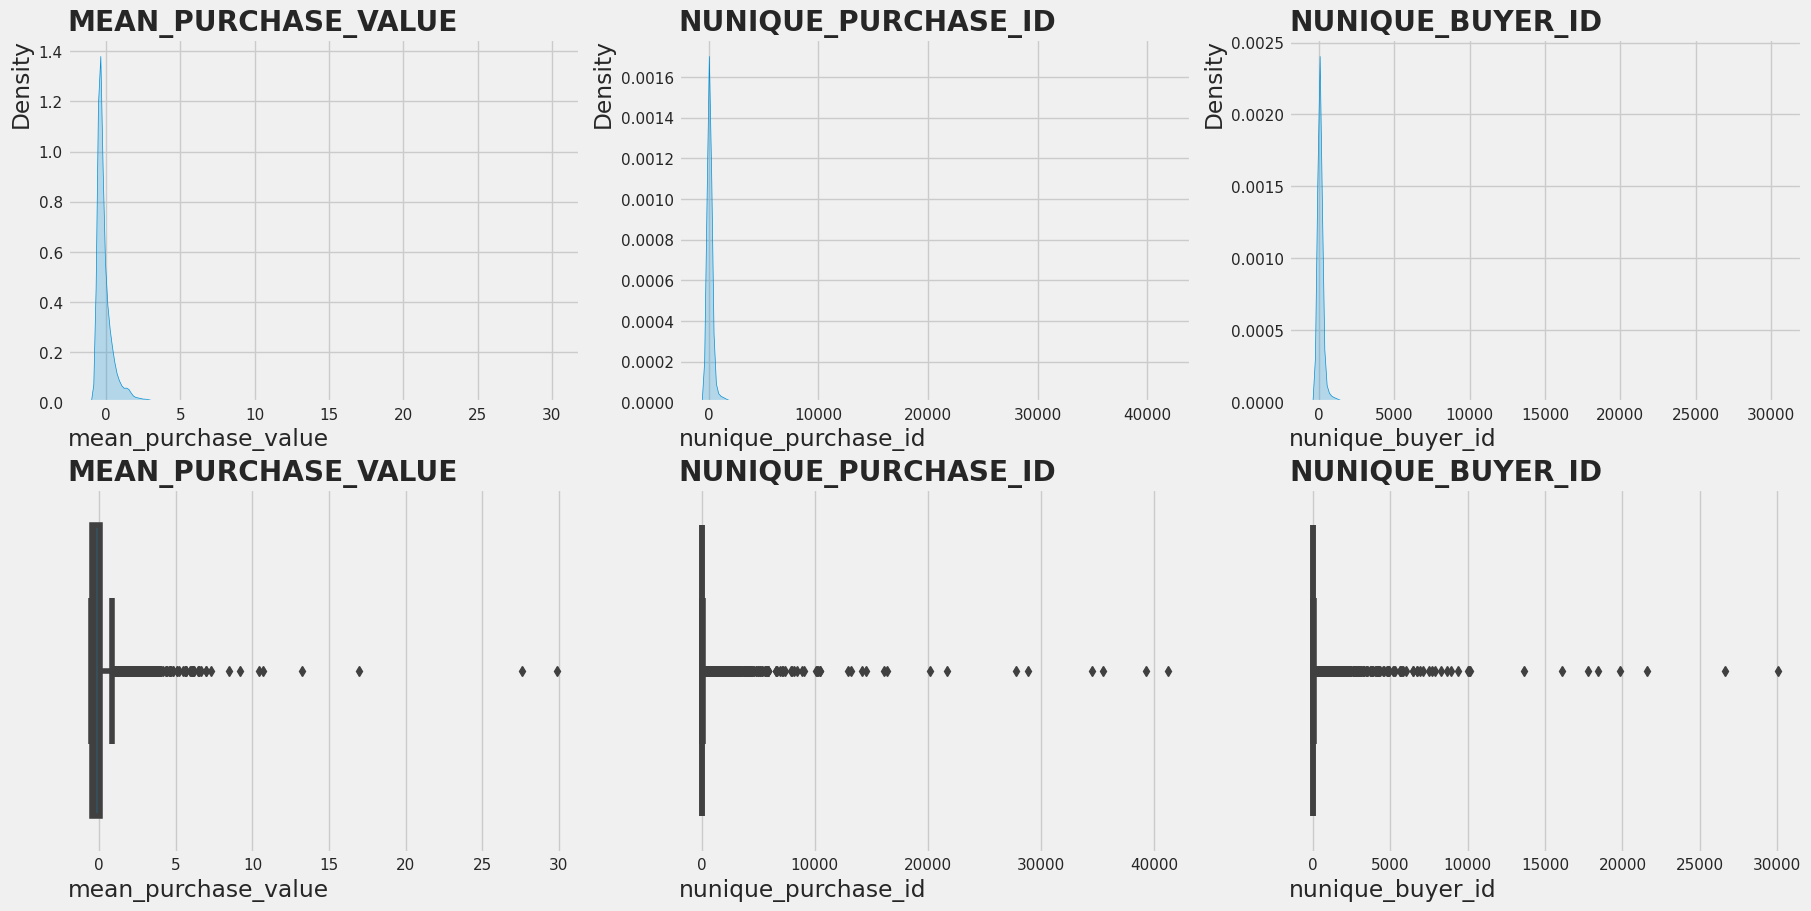

In [61]:
# inspect numerical distribution
numerical_plot(df_producer_purchases.iloc[:, 1:], hist=False)#, figsize=(15, 5))

In [62]:
# create a new column with nunique_buyer_id quantiles
df_producer_purchases["nunique_buyer_id_quantiles"] = pd.qcut(
    x=df_producer_purchases["nunique_buyer_id"], 
    q=10,
    labels=None, retbins=False, duplicates="drop"
)

# create a new column with nunique_buyer_id quantiles
df_producer_purchases["nunique_purchase_id_quantiles"] = pd.qcut(
    x=df_producer_purchases["nunique_purchase_id"], 
    q=10,
    labels=None, retbins=False, duplicates="drop"
)

# inspect results
df_producer_purchases[[
    "nunique_purchase_id", "nunique_purchase_id_quantiles", 
    "nunique_buyer_id", "nunique_buyer_id_quantiles"
    ]].sample(10, random_state=7)

,nunique_purchase_id,nunique_purchase_id_quantiles,nunique_buyer_id,nunique_buyer_id_quantiles
3622,12,"(9.0, 17.0]",2,"(0.999, 2.0]"
2261,14,"(9.0, 17.0]",14,"(8.0, 16.0]"
2606,20,"(17.0, 34.0]",18,"(16.0, 30.0]"
2305,3,"(2.0, 3.0]",3,"(2.0, 3.0]"
2768,1,"(0.999, 2.0]",1,"(0.999, 2.0]"
7912,4,"(3.0, 5.0]",4,"(3.0, 5.0]"
3700,3,"(2.0, 3.0]",3,"(2.0, 3.0]"
1995,4,"(3.0, 5.0]",4,"(3.0, 5.0]"
433,226,"(80.4, 276.2]",211,"(72.0, 232.0]"
3640,155,"(80.4, 276.2]",142,"(72.0, 232.0]"


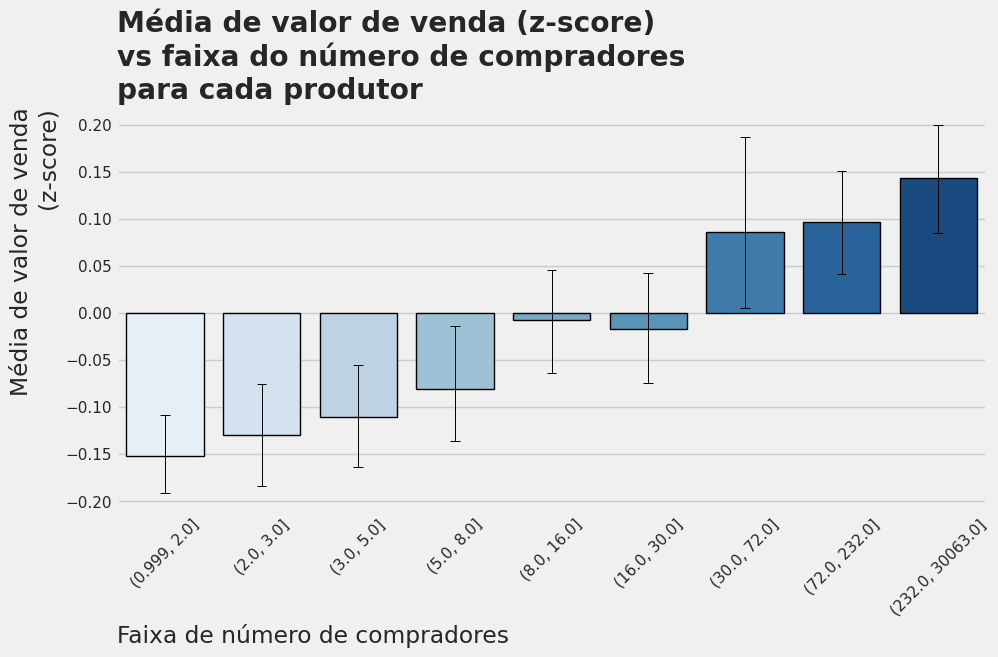

In [63]:
# plot a bar chart
sns.barplot(
    data=df_producer_purchases, x="nunique_buyer_id_quantiles", y="mean_purchase_value",
    estimator="mean", errorbar=("ci", 95), n_boot=1000,
    errcolor="0.0", errwidth=0.7, capsize=0.1,
    linewidth=1, edgecolor=".0",
    palette="Blues"
    )
# plot details
plt.title("Média de valor de venda (z-score)\nvs faixa do número de compradores\npara cada produtor")
plt.ylabel("Média de valor de venda\n(z-score)")
plt.xlabel("Faixa de número de compradores")
plt.xticks(rotation=45)

# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h1", "mean_purchase_value_vs_nunique_buyer_id_quantiles.png"), 
    facecolor="white", bbox_inches="tight"
    );

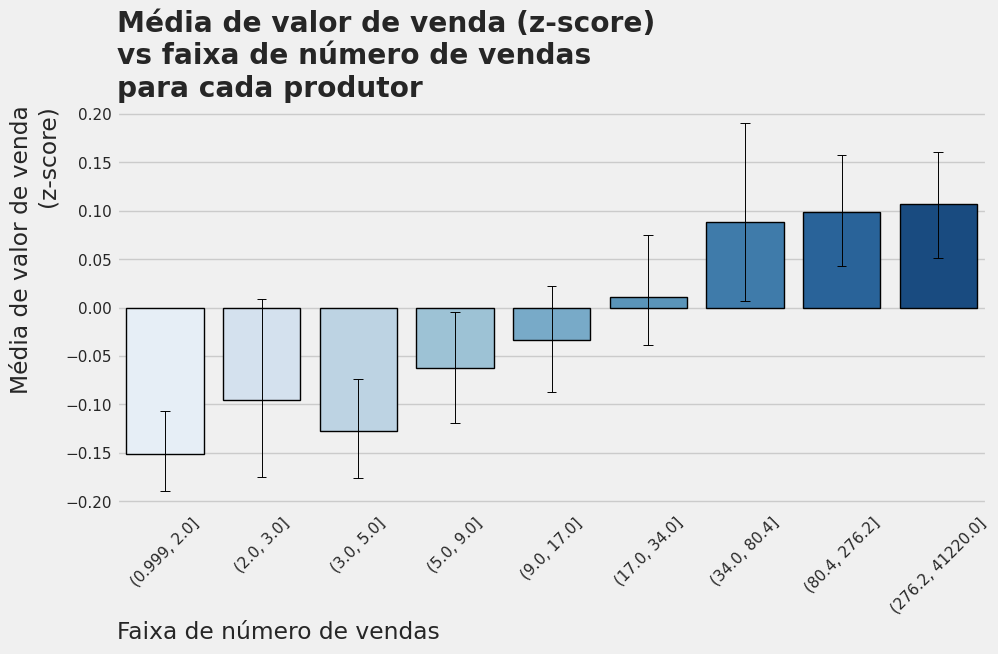

In [64]:
# plot a bar chart
sns.barplot(
    data=df_producer_purchases, x="nunique_purchase_id_quantiles", y="mean_purchase_value",
    estimator="mean", errorbar=("ci", 95), n_boot=1000,
    errcolor="0.0", errwidth=0.7, capsize=0.1,
    linewidth=1, edgecolor=".0",
    palette="Blues"
    )
# plot details
plt.title("Média de valor de venda (z-score)\nvs faixa de número de vendas\npara cada produtor")
plt.ylabel("Média de valor de venda\n(z-score)")
plt.xlabel("Faixa de número de vendas")
plt.xticks(rotation=45)

# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h1", "mean_purchase_value_vs_nunique_purchase_id_quantiles.png"), 
    facecolor="white", bbox_inches="tight"
    );

In [65]:
# delete previous section dataframe to save memory
lst = [df_producer_purchases]
del lst
del df_producer_purchases

## **H2.** Are there any **relevant patterns or trends** in the data?
        - Check for features (correlation between features, feature distributions and time-changes trends) that shows patterns in terms of customers/producers groups or revenue impact or scaling impact.


In [66]:
# inspect dataframe
df_eda.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,is_origin_page_social_network,product_age_when_purchased,binned_affiliate_commission_percentual,binned_product_age_when_purchased,purchase_date_daily
0,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.3,0.0,Smart TV,True,63,"[0, 10)","[60, 70)",2016-06-26
1,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.2,0.0,Smart TV,True,71,"[0, 10)","[70, 80)",2016-06-26
2,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.5,0.0,Smart TV,True,48,"[0, 10)","[40, 50)",2016-06-26
3,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.4,0.0,Smart TV,True,37,"[0, 10)","[30, 40)",2016-06-26
4,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.5,0.0,Smart TV,True,37,"[0, 10)","[30, 40)",2016-06-26


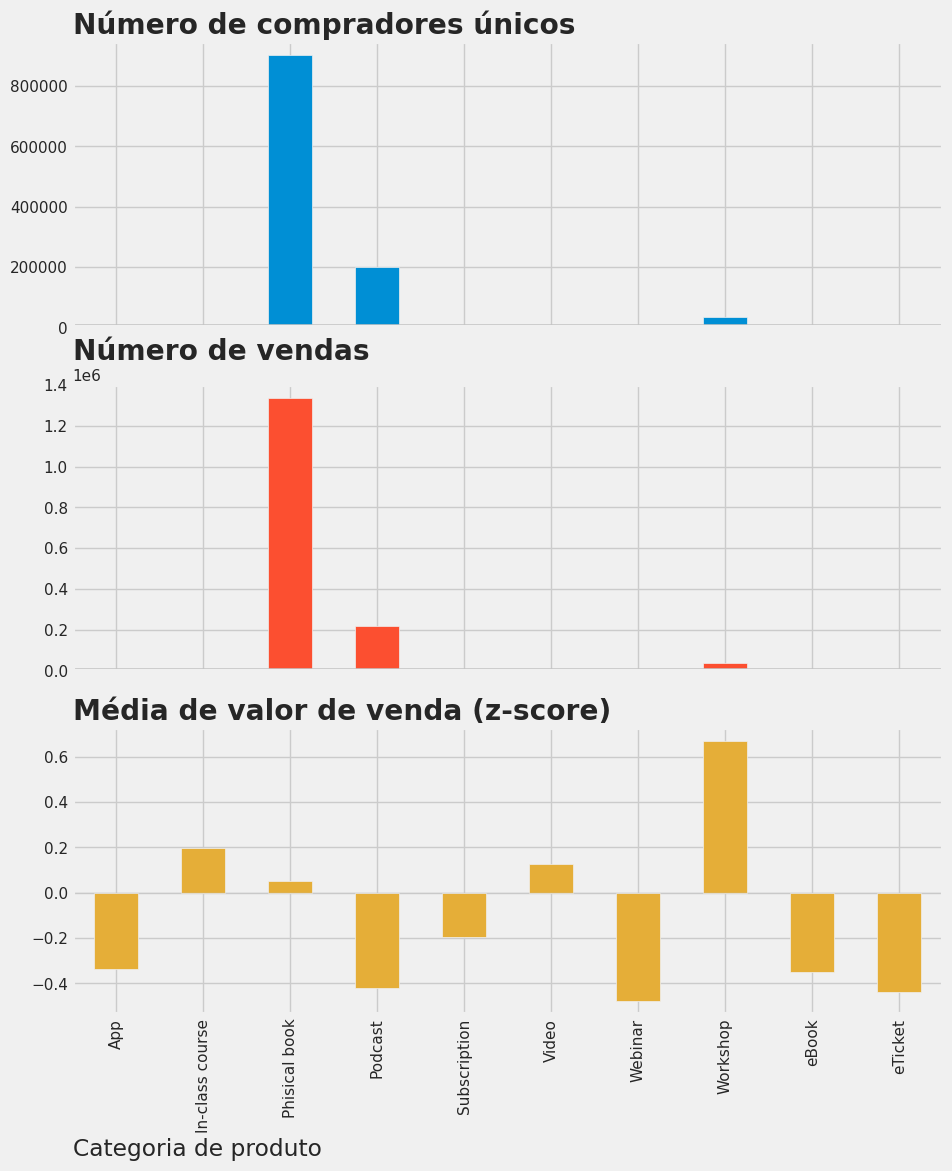

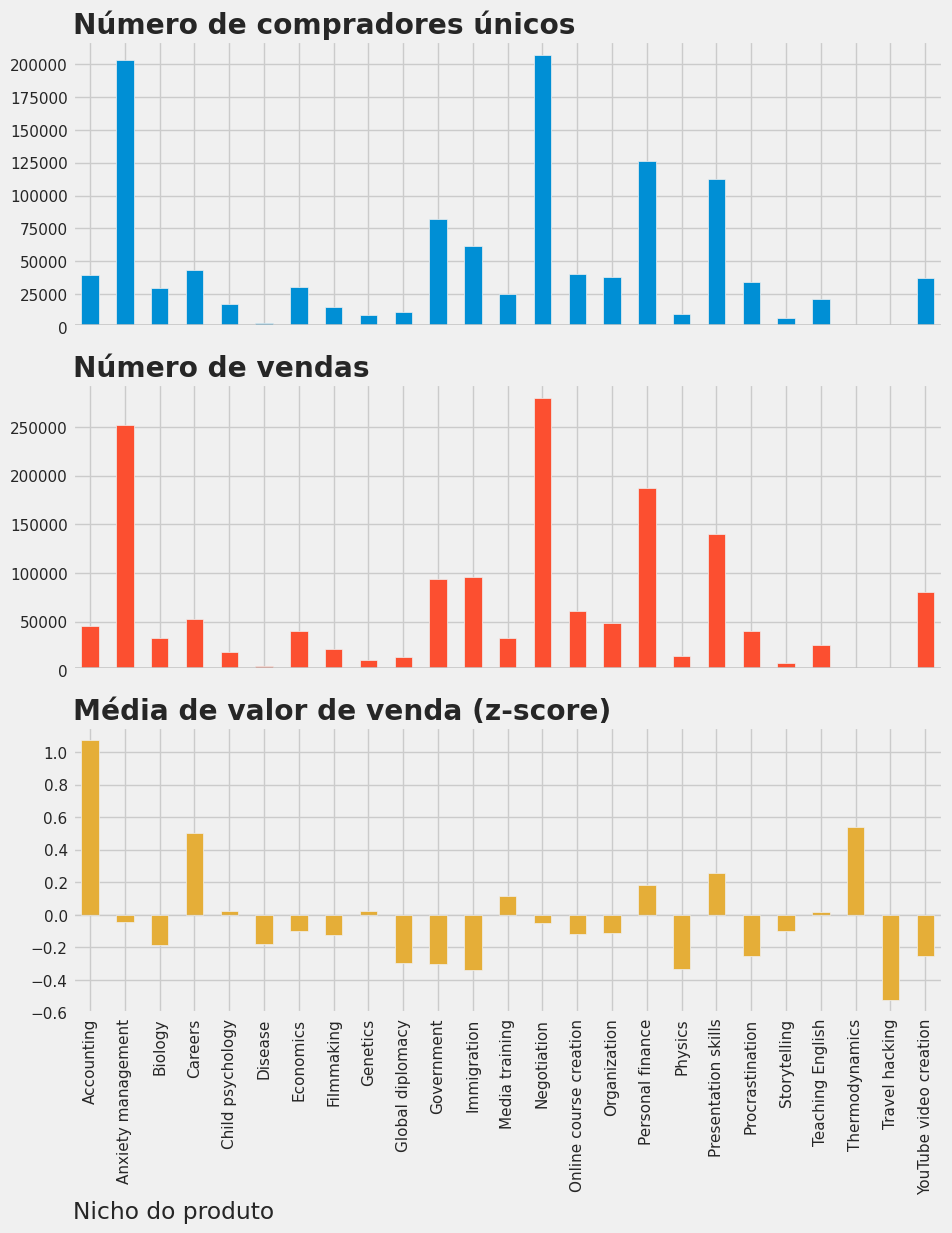

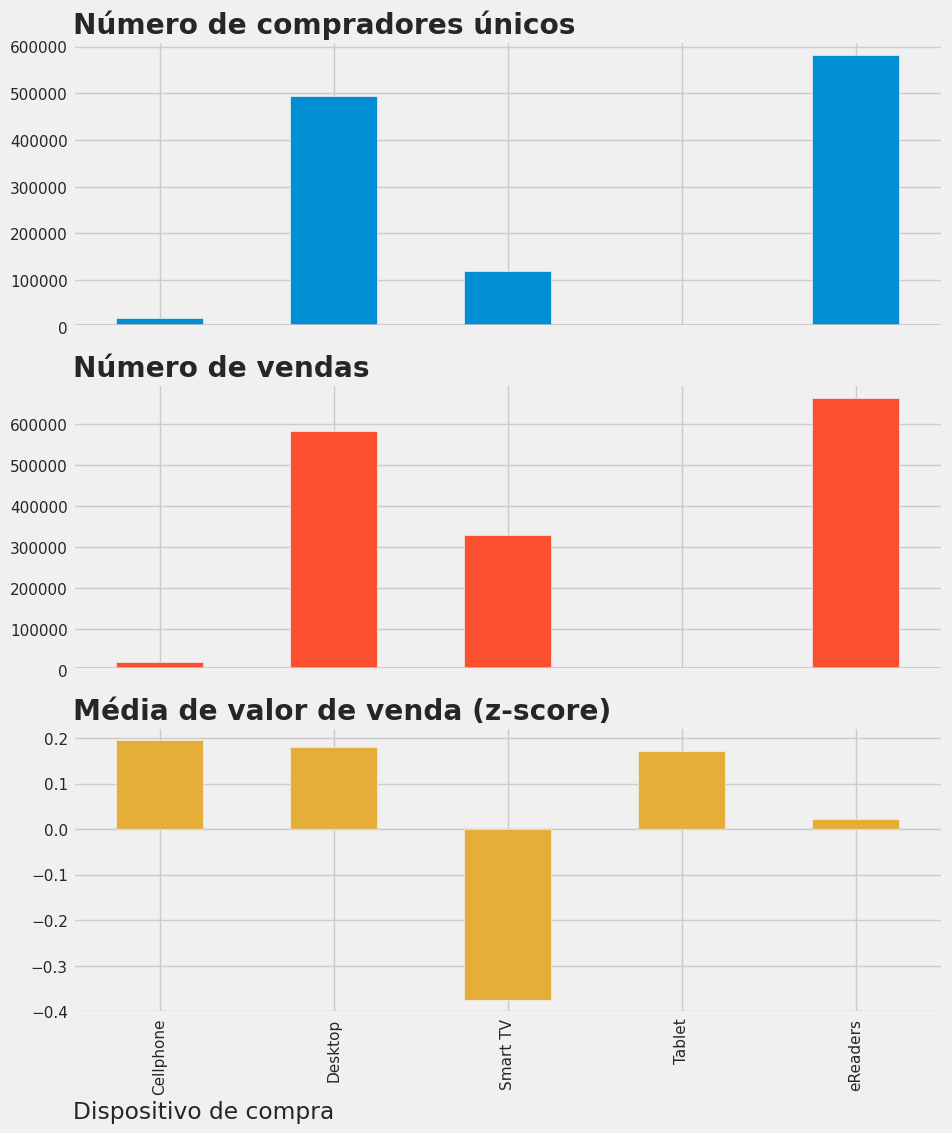

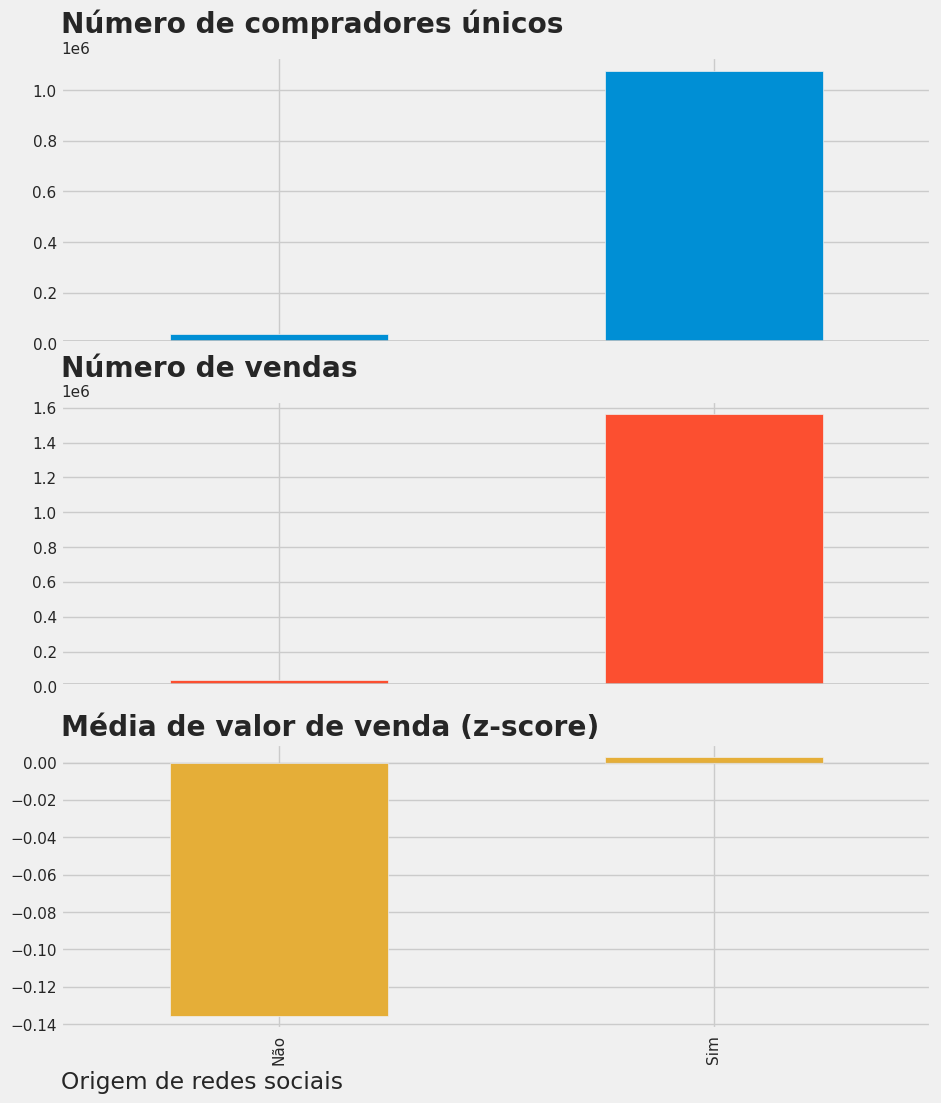

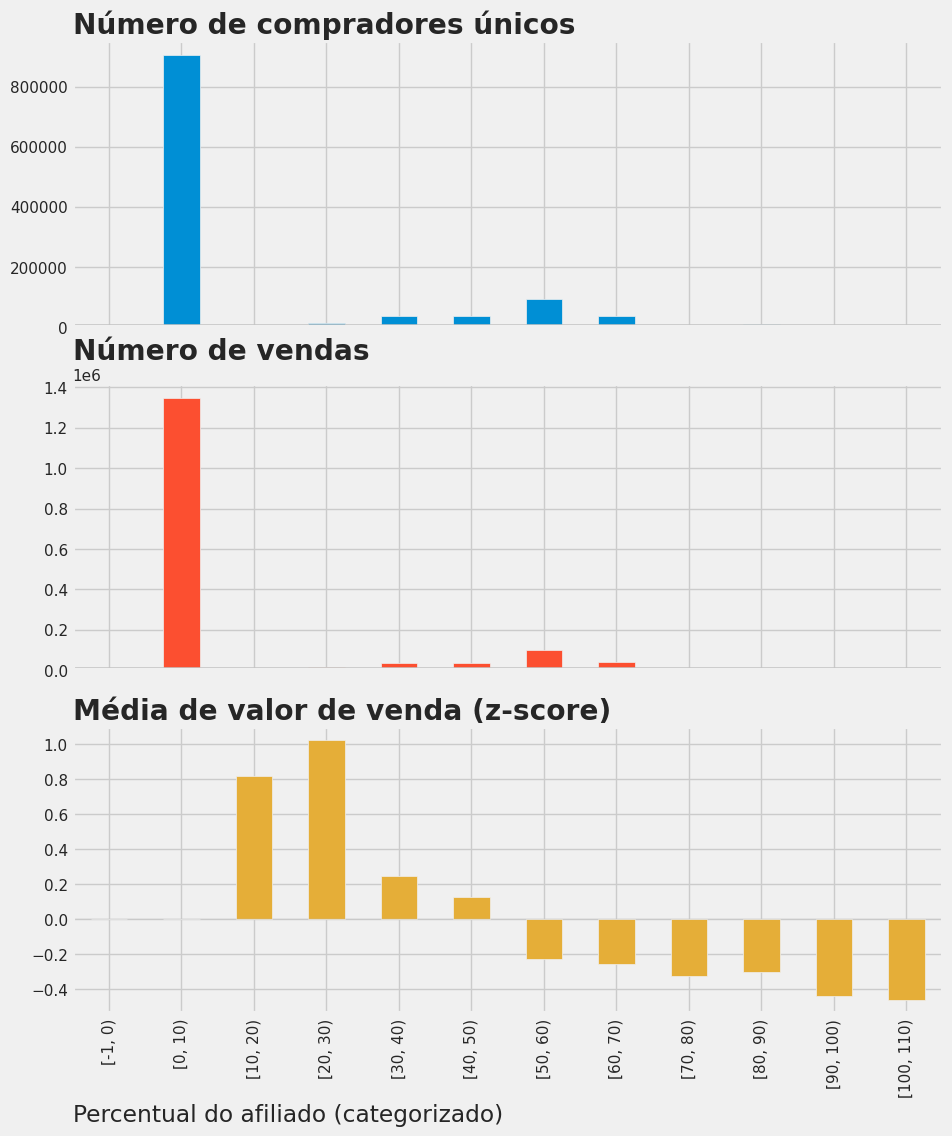

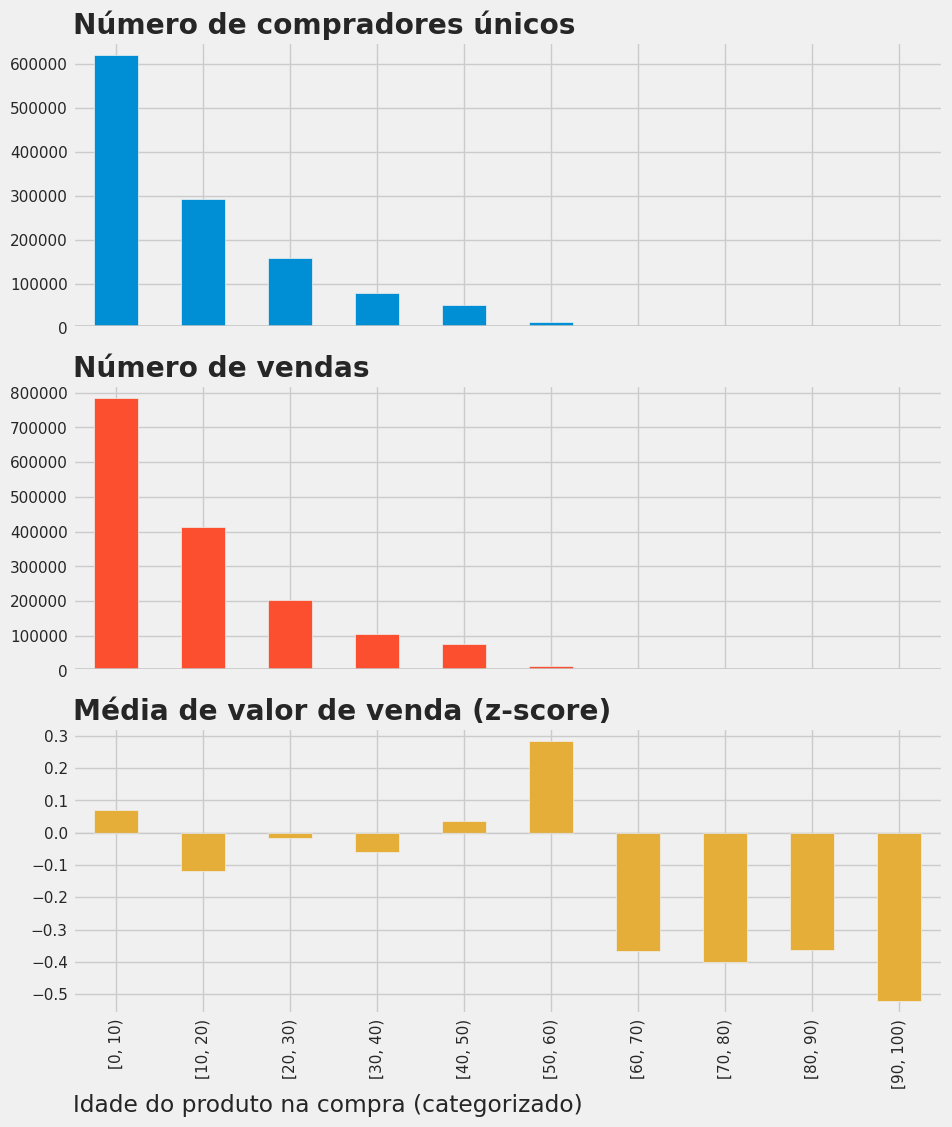

In [67]:
# define a mapping dict for plot
plot_map = dict(
    product_category="Categoria de produto", 
    product_niche="Nicho do produto", 
    purchase_device="Dispositivo de compra", 
    is_origin_page_social_network="Origem de redes sociais",
    binned_affiliate_commission_percentual="Percentual do afiliado (categorizado)", 
    binned_product_age_when_purchased="Idade do produto na compra (categorizado)"
)

# iterate over columns to plot
for feature in [
    "product_category", "product_niche", 
    "purchase_device", "is_origin_page_social_network",
    "binned_affiliate_commission_percentual", "binned_product_age_when_purchased"
    ]:
    # group data by feature and calculate meaningful aggregations for the analysis
    df_product_category_group = df_eda.groupby(
        by=feature, as_index=False).agg(
        nunique_buyer_id = ("buyer_id", "nunique"),
        nunique_purchase_id = ("purchase_id", "nunique"),
        mean_purchase_value = ("purchase_value", "mean"),
    )

    # check if feature column is boolean
    if df_product_category_group[feature].dtypes == "bool":
        # map feature values
        df_product_category_group[feature] = df_product_category_group[feature].map({True:"Sim", False:"Não"})

    # plot feature in respect to nunique_buyer_id, nunique_purchase_id and sum_purchase_value
    ax_nunique_buyer_id, ax_nunique_purchase_id, ax_mean_purchase_value = df_product_category_group.plot.bar(
        x=feature, subplots=True, figsize=(10, 12), 
        legend=False, grid=True, 
        xlabel=plot_map[feature],
        title=["Número de compradores únicos", "Número de vendas", "Média de valor de venda (z-score)"], 
        )
    # define plot details
    #Axis.get_figure(ax_mean_purchase_value).suptitle(plot_map[feature].upper())
    ax_nunique_buyer_id.axhline(y=0, c="Silver")
    ax_nunique_purchase_id.axhline(y=0, c="Silver")
    ax_mean_purchase_value.axhline(y=0, c="Silver", linewidth=0.2)    

    # save figure
    plt.savefig(
        os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h2", f"{plot_map[feature].lower().replace(' ', '_')}.png"), 
        facecolor="white", bbox_inches="tight"
        )

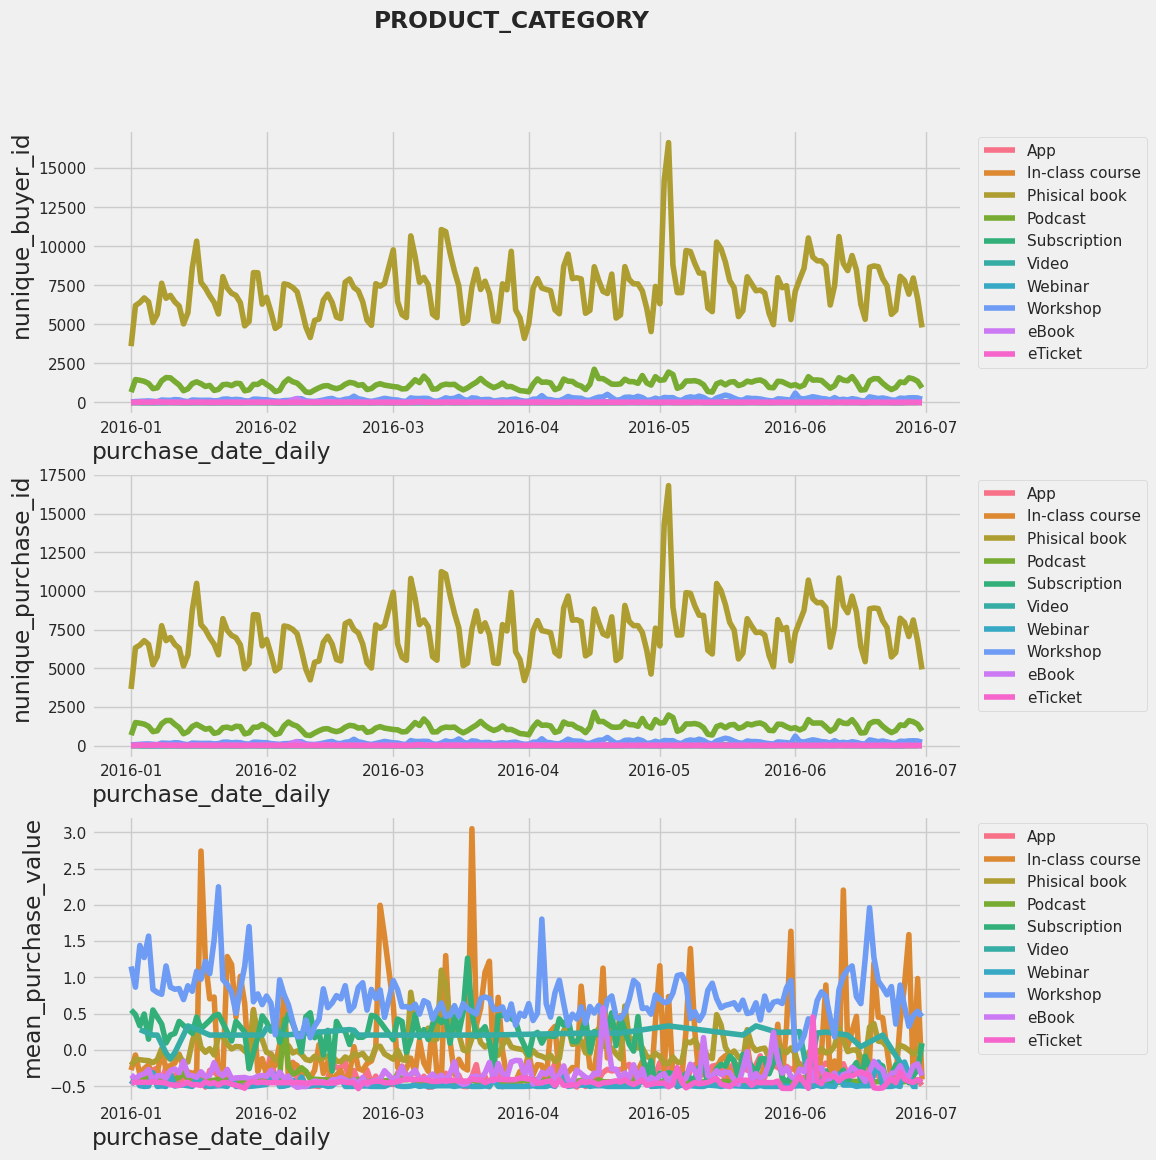

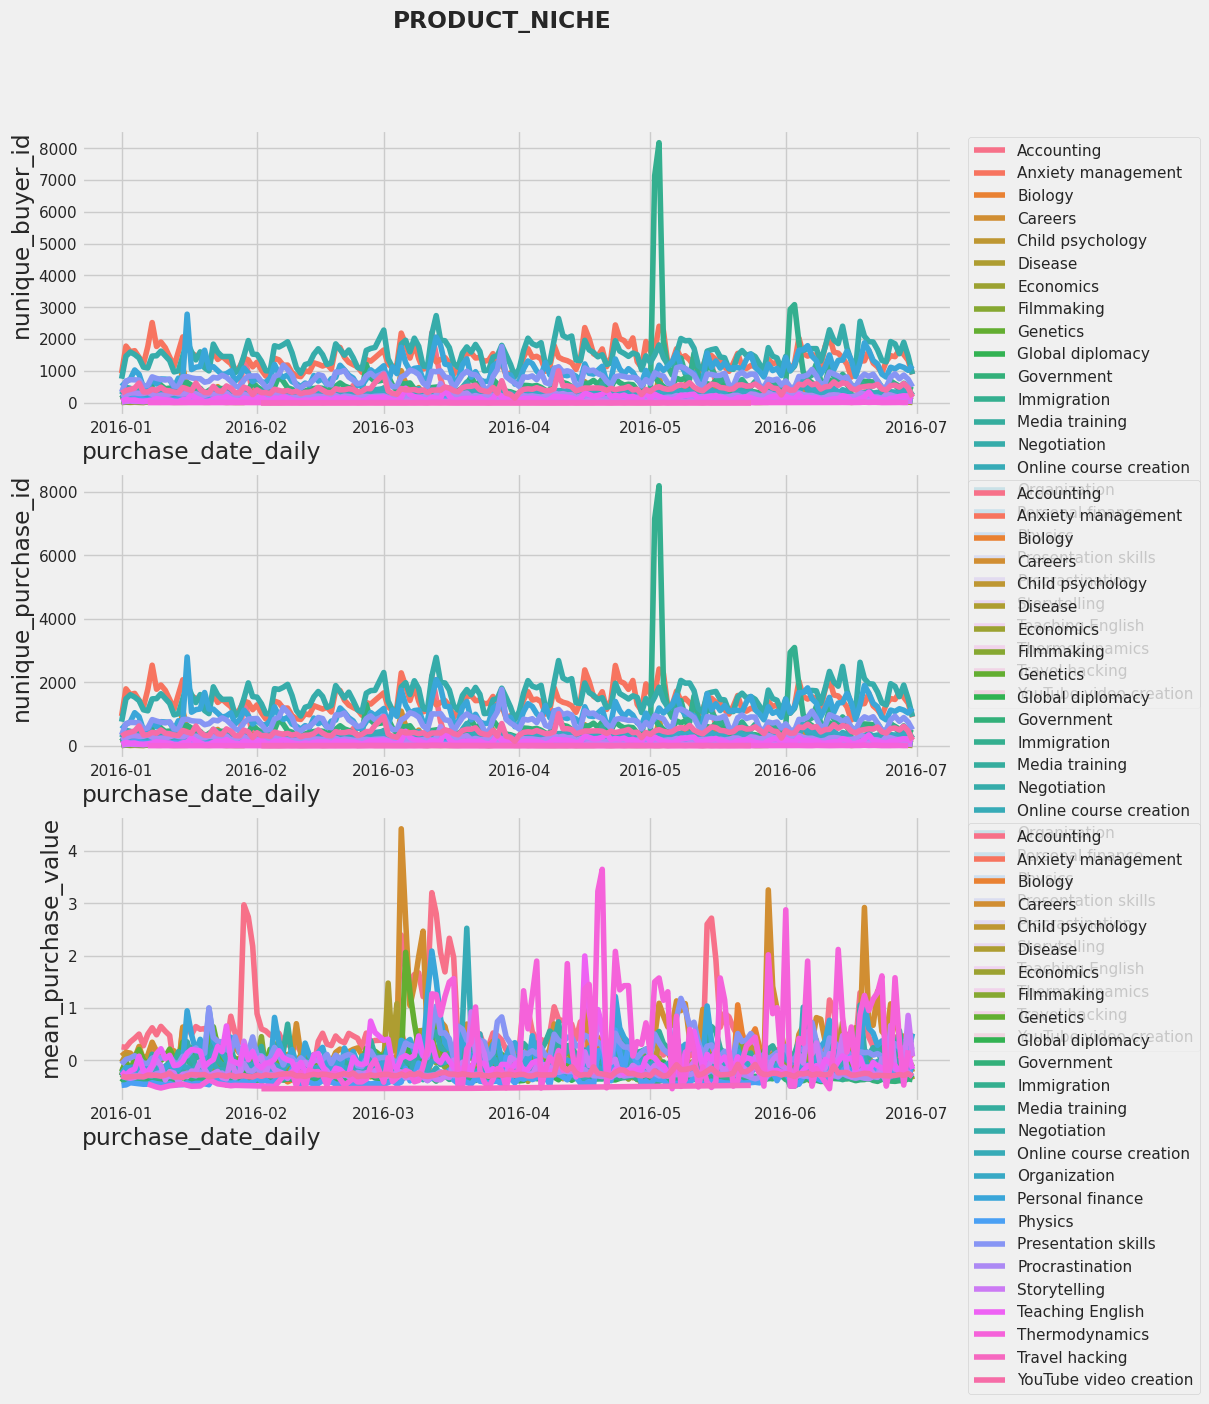

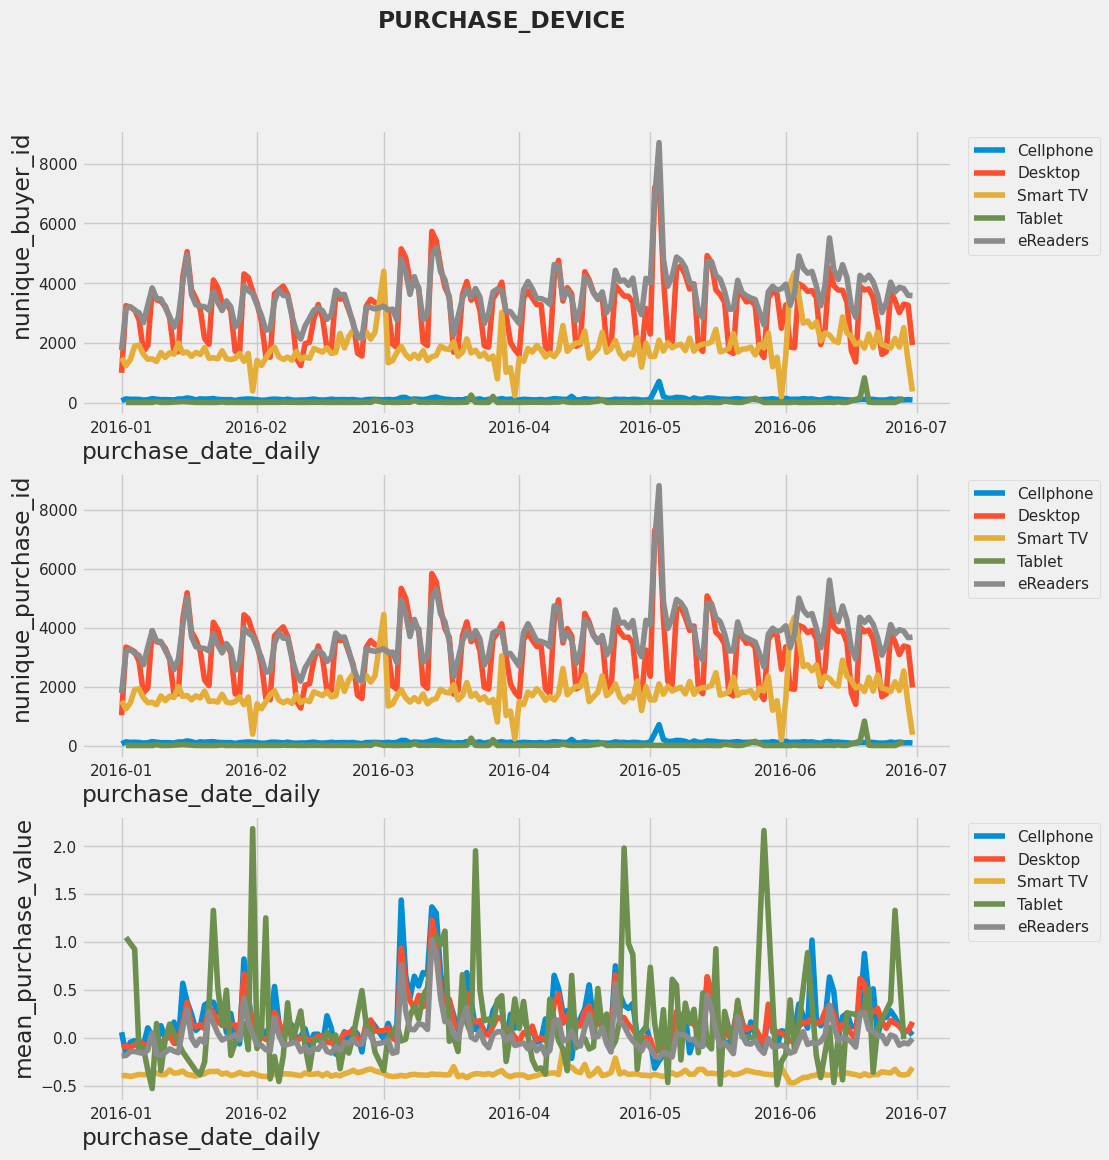

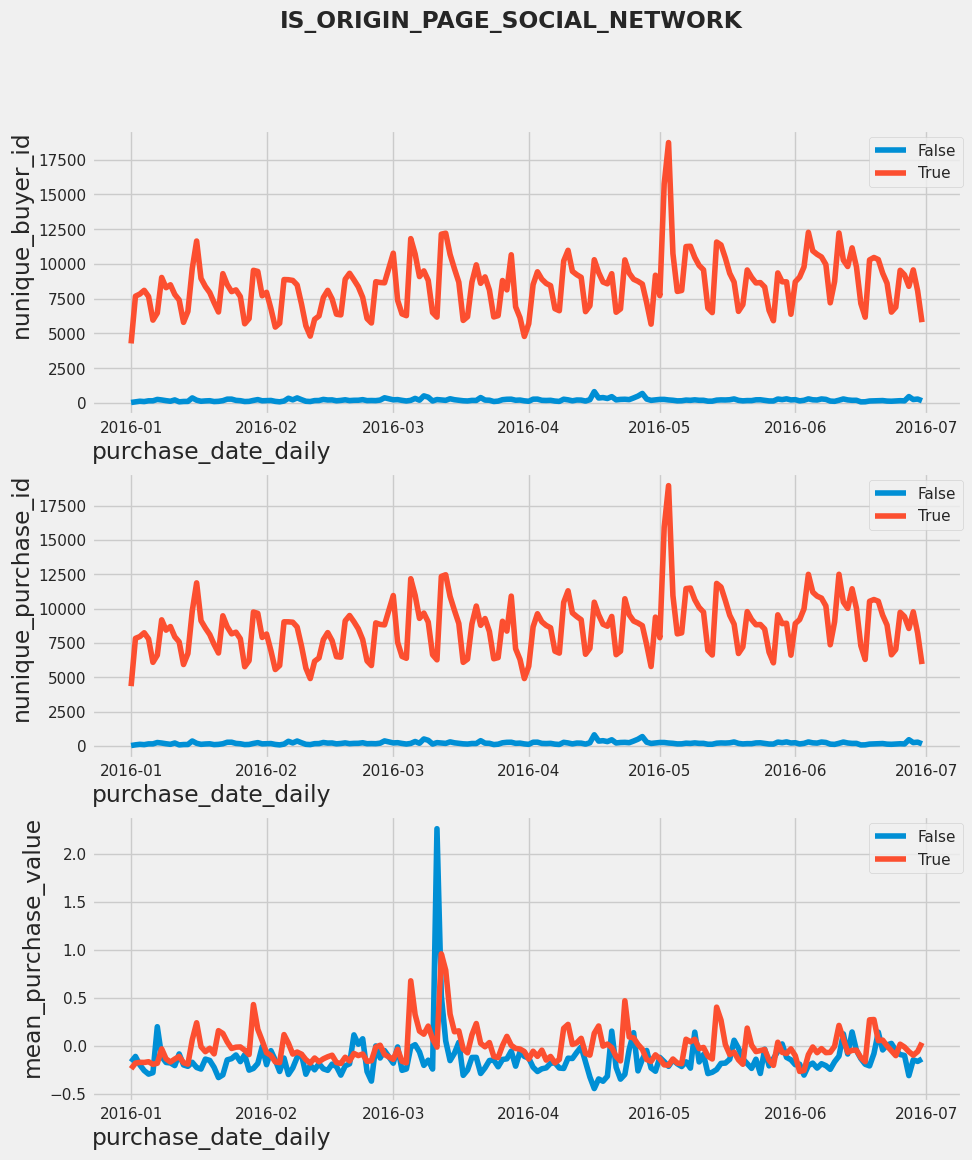

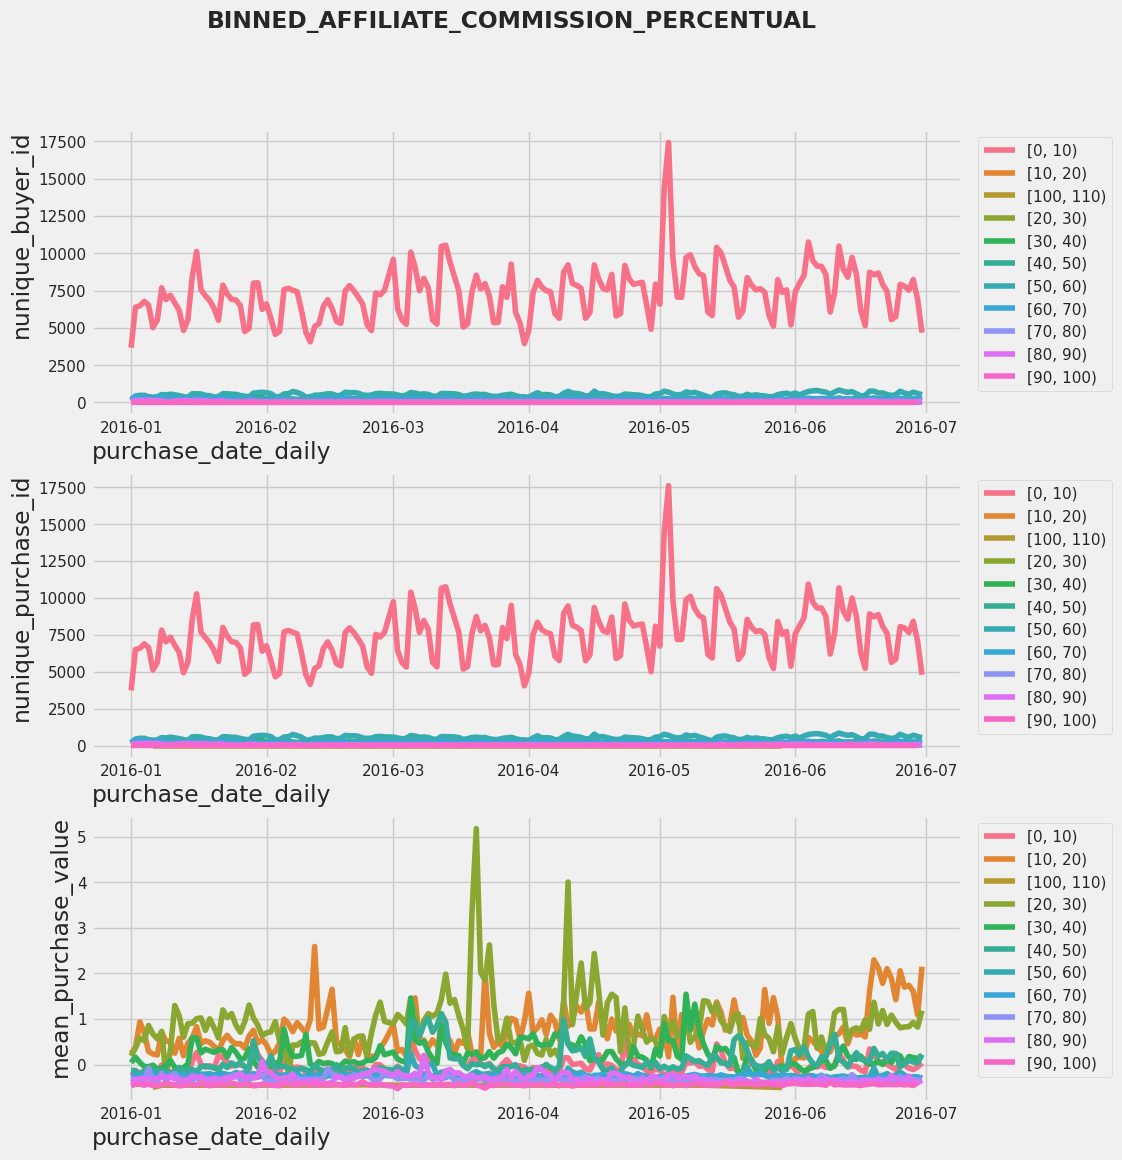

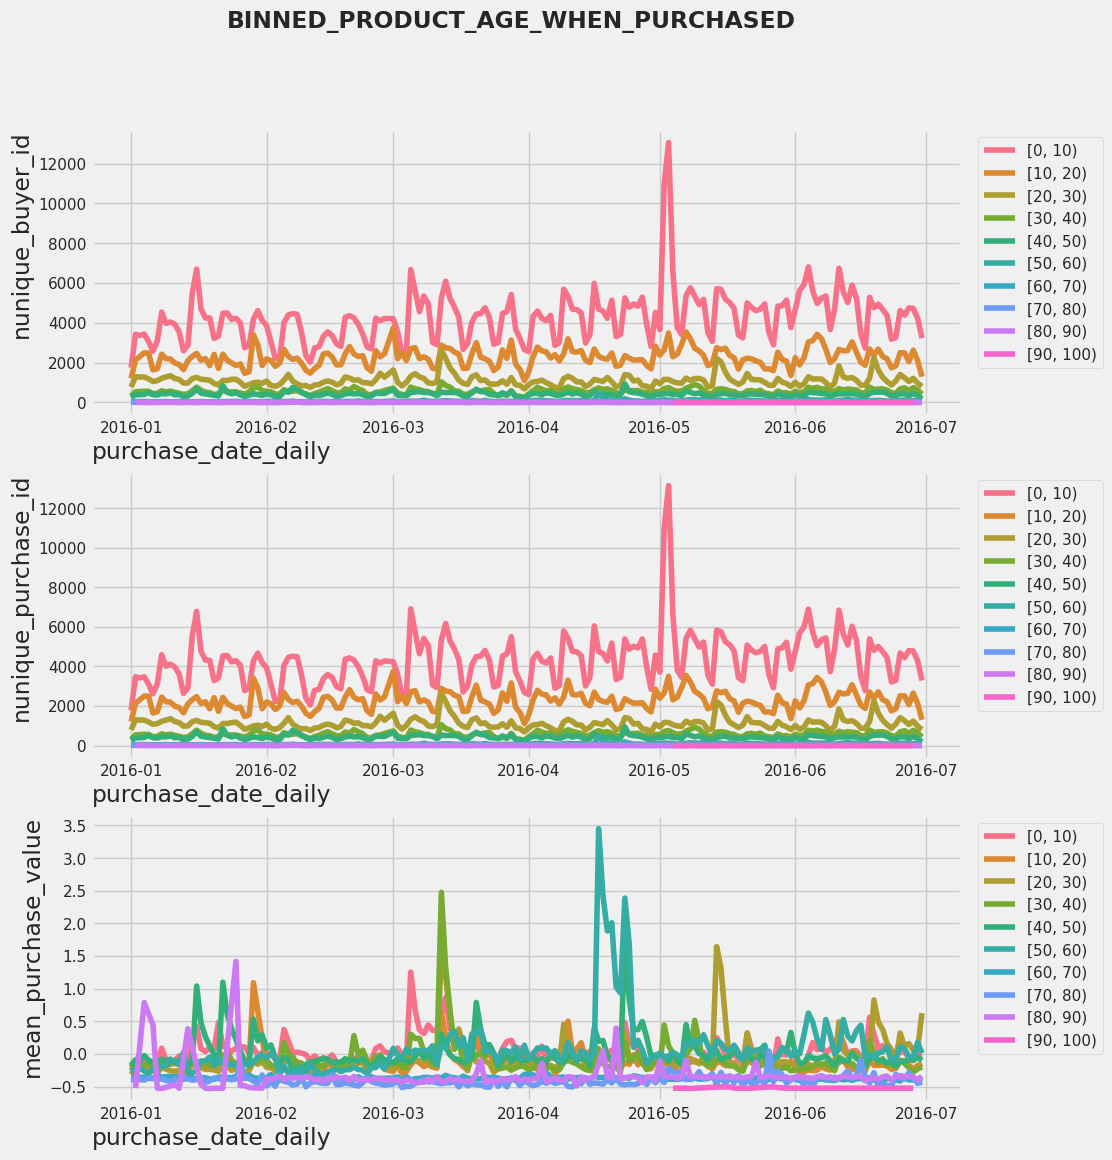

In [68]:
# iterate over columns to plot
for feature in [
    "product_category", "product_niche", "purchase_device", "is_origin_page_social_network",
    "binned_affiliate_commission_percentual", "binned_product_age_when_purchased"
    ]:

    # check if feature is categorical
    if feature in ("binned_affiliate_commission_percentual", "binned_product_age_when_purchased"):
        # convert categorical to string
        dtype_convert = {feature: "str"}
    # feature is not categorical
    else:
        # not need to convert
        dtype_convert = {}

    # define figure layout
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

    # define figure title
    fig.suptitle(feature.upper())

    # group data by feature and calculate meaningful aggregations for the analysis
    df_product_category_group = df_eda.astype(dtype_convert).groupby(
        by=[feature, "purchase_date_daily"], as_index=False).agg(
        nunique_buyer_id = ("buyer_id", "nunique"),
        nunique_purchase_id = ("purchase_id", "nunique"),
        mean_purchase_value = ("purchase_value", "mean"),
    )

    # iterate over target variables for subplots
    for idx, target in enumerate(["nunique_buyer_id", "nunique_purchase_id", "mean_purchase_value"]):
        # plot a line on subplot
        sns.lineplot(
            data=df_product_category_group, 
            x="purchase_date_daily", 
            y=target, 
            hue=feature,
            ax=axs[idx])
        # define legend position
        axs[idx].legend(bbox_to_anchor=(1.01, 1))
    
    # display
    plt.show()

In [69]:
# delete previous section dataframe to save memory
lst = [df_product_category_group]
del lst
del df_product_category_group

## **H3.** It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
        - What is the purpose of segmenting customers?
          - Find out what are the best customers and what coould be done to change the behaviour of the not-best ones. 
          - Revenue from best customer could support scaling efforts.
        - Check for features that can cluster customer/producers for better revenue undestanding
          - Initially try RFM (Recency-Frequency-Monetary)


In [ ]:
# get latest purchase date
latest_purchase_date = df_eda["purchase_date"].max()
# print report
print(
    f"Latest purchase data on dataframe: {latest_purchase_date}"
)

# group data by customer and aggregate required column to create RFM score
df_rfm = df_eda.groupby(by="buyer_id", as_index=False).agg(
    # ======= Recency ======= #
    # Create Recency feature -> time interval to the last purchase.
    # Once the dataframe is outdated, recency will be calculated 
    # with respect to the most recent date
    latest_customer_purchase = ("purchase_date", "max"),
    # ======= Frequency ======= #
    # create Frequency feature -> how many times the customer made a purchase
    frequency = ("purchase_id", "nunique"),
    # ======= Monetary =======#
    # create Monetary -> total spent by customer
    # 🚨 ! remember that purchase_value is on Z-scale -> positive and/or negative values ! 🚨
    monetary = ("purchase_value", "sum"),
)

# get how many day between customer latest purchase date and data collection
df_rfm["recency"] = (latest_purchase_date - df_rfm["latest_customer_purchase"]).dt.days
# create a constant column with latest_customer_purchase
df_rfm["db_latest_purchase_date"] = latest_purchase_date

# get shape before reshaping
shape_before=df_rfm.shape

# reorder columns
df_rfm = df_rfm[["buyer_id", "db_latest_purchase_date", "latest_customer_purchase",
                 "frequency", "monetary", "recency"]]

# sanity check
assert (df_rfm.shape[0] == shape_before[0]) & (df_rfm.shape[1] == shape_before[1]), "Error when reordering columns!"

# inspect results
df_rfm.sample(10, random_state=7)

In [ ]:
# define a dict to store RFM transformation
rfm_transform = {}

In [ ]:
# get dataframe shape before feature engineering
shape_before = df_rfm.shape


# create R feature -> recency feature in a scale from 1 until 5
# calculate values to cut R into bins into discrete intervals.
recency_qcut = pd.qcut(x=df_rfm["recency"], q=5, labels=False, retbins=True, 
                       precision=3, duplicates='raise')
# assgin R bins
df_rfm['R'] = recency_qcut[0]
# save bins limits
rfm_transform["R"] = {"right": True, "bins": recency_qcut[1]}


# create M feature -> monetary feature in a scale from 1 until 5
# calculate values to cut M into bins into discrete intervals.
monetary_qcut = pd.qcut(x=df_rfm["monetary"], q=5, labels=False, retbins=True, 
                     precision=3, duplicates='raise')
# assgin M bins
df_rfm['M'] = monetary_qcut[0]
# save bins limits
rfm_transform["M"] = {"right": True, "bins": monetary_qcut[1]}


# sanity check
assert (df_rfm.shape[0] == shape_before[0]) & ((df_rfm.shape[1] == shape_before[1] +2)), "Misleading feature engineering processing!"

# inspect results
display(
    rfm_transform, 
    df_rfm.sample(10, random_state=7)
    )

In [ ]:
# inspect frequancy
sns.ecdfplot(data=df_rfm, x="frequency", stat="proportion")
# plot details
plt.ylim(0, 1.05)
plt.title("ECDF plot for frequency")
plt.xlim(0, 10)
plt.xticks([*range(1, 10)])
plt.yticks([i/100 for i in range(0, 101, 5)]);

In [ ]:
# define quantiles to inspect
q = [0.5, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99] # lazy! 
# iterate over quantiles to inspect
for q_ in q:
    # print report
    print(
        f'Frequency quantile {q_:.2f} = {df_rfm["frequency"].quantile(q=q_, interpolation="linear"):.0f}'
    )

In [ ]:
# Frequency -> there are many quantiles have same frequency values
# it is a problem if we try to split into this quantiles.
# As frequency distribution is skew -> split using business understanding, not quantiles/percentiles

# mapping frequency values into F customer 'labels'
# F = 1 if: frequency = 1
# F = 2 if:  1 < frequency <= 2
# F = 3 if:  2 < frequency <= 4
# F = 4 if:  4 < frequency <= 7 
# F = 5 if:  frequency > 7
# create bins of the mapping
m_bins = [ 0, 1, 2, 4, 7, 100 ]
# create labels of the mapping
m_labels = (0, 1, 2, 3, 4)
# calculate values to cut F into bins into discrete intervals.
frequency_cut = pd.cut( 
    x=df_rfm['frequency'], 
    bins=m_bins, labels=m_labels,
    right=True, retbins=True, include_lowest=False, ordered=True
    )
# map frequency feature into F feature
df_rfm['F'] = frequency_cut[0].tolist()
# save bins limits
rfm_transform['F'] = {"right": True, "include_lowest": False, "bins": frequency_cut[1]}

# sanity check
assert len(df_rfm["F"].unique()) == 5, "Missing F label on preprocessing"

# inspect results
display(
    rfm_transform, 
    df_rfm.sample(20, random_state=7)
)

In [ ]:
# add 1 to R, M and F -> easier to interpret
df_rfm[["R", "M", "F"]] = df_rfm[["R", "M", "F"]] + 1

# calculate mean RFM for each customer
df_rfm['avg_RFM'] = df_rfm[['R', 'F', 'M']].mean(axis = 1)

# inspect results
check_dataframe(df_rfm, summary_stats=True, size=10)

In [ ]:
# add some noise to RFM so as to better visualize it
for col in ["R", "M", "F"]:
    # create a new column with a normal noise
    df_rfm[f"{col}_noisy"] = df_rfm[col] + np.random.normal(loc=0, scale=0.3, size=len(df_rfm))

# inspect results
df_rfm.sample(10, random_state=7)    

In [ ]:
# visualy inspect clusters
sns.scatterplot(data=df_rfm.sample(10_000), 
                x="R_noisy", y="F_noisy", 
                hue="M_noisy", hue_order=[0, 1, 2, 3, 4],
                alpha=0.2);

In [ ]:
# inspect dataframe
check_dataframe(df_rfm, summary_stats=True, size=1)

In [ ]:
# create bins of the mapping
m_bins = [ 1, 2, 3, 4, 5 ]
# create labels of the mapping
m_labels = (1, 2, 3, 4)

# calculate values to cut RFM into bins into discrete intervals.
rfm_cut = pd.cut( 
    x=df_rfm['avg_RFM'], 
    bins=m_bins, labels=m_labels,
    right=True, retbins=True, include_lowest=True, ordered=True
    )
# map frequency feature into F feature
df_rfm['cluster'] = rfm_cut[0].tolist()
# save bins limits
rfm_transform['RFM'] = {"right": True, "include_lowest": False, "bins": rfm_cut[1]}

# inspect dataframe
df_rfm.sample(20, random_state=49)

In [ ]:
# inspect dataframe
check_dataframe(df_rfm, summary_stats=True, size=1)

In [ ]:
# get cluster description
df_cluster = df_rfm.groupby(by="cluster", as_index=False).agg(
    cluster_avg_recency = ("recency", "mean"),
    cluster_avg_frequency = ("frequency", "mean"),
    cluster_avg_monetary = ("monetary", "mean"),
    cluster_size = ("buyer_id", "nunique")
)

# get RFM for clusters mean
df_cluster["clusters_r"] = np.digitize(x=df_cluster["cluster_avg_recency"], bins=rfm_transform["R"]["bins"], right=True)
df_cluster["clusters_f"] = np.digitize(x=df_cluster["cluster_avg_frequency"], bins=rfm_transform["F"]["bins"], right=True)
df_cluster["clusters_m"] = np.digitize(x=df_cluster["cluster_avg_monetary"], bins=rfm_transform["M"]["bins"], right=True)

# inspect results
df_cluster

In [ ]:
# plot average RFM for each cluster
sns.scatterplot(data = df_cluster, x = 'cluster_avg_frequency', y = 'cluster_avg_recency', 
                size = 'cluster_size', hue = 'cluster_avg_monetary',
                palette="tab10"
                )
# plot details
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylim(0, 150)
plt.xlim(0.5, 6);

In [ ]:
# get info from cluster percent size
df_cluster['cluster_size_percent'] = ( df_cluster['cluster_size'] / df_cluster['cluster_size'].sum() ) * 100

# give friendly name to clusters
df_cluster['cluster'] = df_cluster['cluster'].map({
    1: 'Winter', 
    2: 'Autumn', 
    3: 'Spring', 
    4: 'Summer'
} )

# inspect results
df_cluster

In [ ]:
# save as csv
df_cluster.to_csv(
    os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "df_cluster.csv"),
    header=True, index=False, mode="w"
    )

In [ ]:
# iterate over clusters
for cluster in ["Summer", "Spring", "Autumn", "Winter"]:
    # get info for report
    num_customers = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_size"].tolist()[0]
    num_customers_percent = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_size_percent"].tolist()[0]
    avg_recency = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_avg_recency"].tolist()[0]
    avg_frequency = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_avg_frequency"].tolist()[0]
    avg_monetary = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_avg_monetary"].tolist()[0]

    # print report
    # print final report
    print(
        f"{cluster.upper()} cluster:\n"
        f"\tnumber of customers: {num_customers} ({num_customers_percent:.2f}% of customers)\n"
        f"\taverage recency:     {int(avg_recency)} days (days since last purchase)\n"
        f"\taverage frequency:   {avg_frequency:.1f} purchases (in average)\n"
        f"\taverage money spent: {avg_monetary:.1f} (average spent per customer in Z-score)\n"
    )

In [ ]:
# check rfm mapping
rfm_transform

In [ ]:
# save bins mapping
with open(os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "rfm_map.pickle"), "wb") as f:
    # save mapping as pickle
    pickle.dump(
        obj=rfm_transform,
        file=f,
        protocol= pickle.HIGHEST_PROTOCOL
    )

# save bins mapping
with open(os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "rfm_map.pickle"), "rb") as f:
    # save mapping as pickle
    rfm_transform = pickle.load(
        file=f,
    )

# check mapping bins
rfm_transform

In [ ]:
########################################
####### check streamlit interface ######
########################################

r = 100
f = 1.5
m = -0.2

customer_r = np.digitize(x=r, bins=rfm_transform["R"]["bins"], right=True)
customer_f = np.digitize(x=f, bins=rfm_transform["F"]["bins"], right=True)
customer_m = np.digitize(x=m, bins=rfm_transform["M"]["bins"], right=True)

display("rfm map:", rfm_transform)

print(
    f"Customer R: {customer_r}\n"
    f"Customer F: {customer_f}\n"
    f"Customer M: {customer_m}\n"
)

**Streamlit app to validate use of RFM segmentation**:

- https://ds-gustavo-cunha-hotmart-case-streamlit-app-rddkkh.streamlit.app/

In [ ]:
# delete previous section dataframe to save memory
lst = [df_cluster, df_rfm, recency_qcut]
del lst
del df_cluster
del df_rfm
del recency_qcut

## **H4.** It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

In [ ]:
# inspect datetime columns
datetime_summary(df_eda)

*There are only 6 months of purchase history so it's quite complex to predict future purchases for the next months with such few amount of data (how to extract trend, seasonality and so on?).*

**We will try to use a daily purchase frequency instead to workaround the lack of data in monthly frequency**

In [ ]:
# groupby date and get meaningful agg for each feature
df_daily_purchases_agg = df_eda.groupby(
    by=["purchase_date_daily"], as_index=False).agg(
    mean_purchase_value =("purchase_value", "mean"),
    mean_product_age_when_purchased = ("product_age_when_purchased", "mean"),
    mean_affiliate_commission_percentual = ("affiliate_commission_percentual", "mean"),
    nunique_purchase_id = ("purchase_id", "nunique"),
    nunique_product_id = ("product_id", "nunique"),
    nunique_affiliate_id = ("affiliate_id", "nunique"),
    nunique_buyer_id = ("buyer_id", "nunique"),
    nunique_product_category = ("product_category", "nunique"),
    nunique_product_niche = ("product_niche", "nunique"),
    nunique_purchase_device = ("purchase_device", "nunique"),
    nunique_is_origin_page_social_network = ("is_origin_page_social_network", "nunique")
)

# define purchase_date_daily as index and set its frequency to daily
df_daily_purchases_agg = df_daily_purchases_agg.set_index("purchase_date_daily").asfreq("D")

# interpolate any missing value on the time series
df_daily_purchases_agg = df_daily_purchases_agg.interpolate(method='linear', axis=0)

# inspect preprocessing
df_daily_purchases_agg.head()

In [ ]:
# iterate over columns
for col in df_daily_purchases_agg.columns.tolist():
    # print report
    print(
        f"{'*'*49}\n"
        f"\t{col.upper()}\n"
        f"{'*'*49}\n"
    )
    # plot seasonal decompose
    seasonal_decompose(df_daily_purchases_agg[col], model='additive').plot()
    # plot details
    g = plt.gcf()
    g.set_size_inches(12, 7)
    plt.show()

In [ ]:
df_daily_purchases_agg["mean_purchase_value"].rename({"mean_purchase_value": "média do valor de venda"})

In [ ]:
# inspect again target variable
sd = seasonal_decompose(
    x=df_daily_purchases_agg["mean_purchase_value"].rename("Média do valor de venda\n"), 
    model='additive')
g = sd.plot();
# define plot details
g.set_figwidth(12)
g.set_figheight(9)

# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "sazonal_decomposition_full.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# visually inspect residuals
plt.plot(sd.seasonal)
plt.title("Sazonalidade da decomposição aditiva")
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "sazonal_decomposition_season.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# visually inspect residuals
plt.plot(sd.resid)
plt.title("Additive seasonal decompose residuals");

In [ ]:
# perform Augmented Dickey Fuller - ADF to check for stationarity
# H0: The series is not-stationary
adfuller(df_daily_purchases_agg["mean_purchase_value"])[1]  # p-value

In [ ]:
# define figure layout
fig, axs = plt.subplots(nrows=1, ncols=2)
# plot acf and padf
plot_acf(df_daily_purchases_agg["mean_purchase_value"], c="r", zero=True, ax=axs[0])
plot_pacf(df_daily_purchases_agg["mean_purchase_value"], c="y", zero=True, ax=axs[1])
# plot details
axs[0].set_ylim(-0.5, 1.05)
axs[1].set_ylim(-0.5, 1.05)
plt.show()

#### *ARIMA*

In summary, initial guess is:

- **p = 1, q = 2, i = 0**

In [ ]:
# define model dataset
df_modelling = df_daily_purchases_agg["mean_purchase_value"]

# define training ratio and split index
# tr = 0.75
# split_index = int(len(df_modelling)*0.7)
split_index = -30

# split dataset
train = df_modelling.iloc[:split_index]
test = df_modelling.iloc[split_index:]

# inspect results
print(
    f"Train:\n\tmin={train.index.min()}; \n\tmax={train.index.max()}\n\n"
    f"Test: \n\tmin={test.index.min()}; \n\tmax={test.index.max()}"
    )
train

In [ ]:
# define ARIMA model
arima = ARIMA(
    endog=train, 
    exog=None, 
    order=(1, 0, 2), 
    seasonal_order=(0, 0, 0, 0), 
    # trend="ct", 
    enforce_stationarity=True, 
)    

# fit model to data
arima = arima.fit()
# check results
arima.summary()

In [ ]:
# define plot layout
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
# plot real values
axs.plot(df_daily_purchases_agg["mean_purchase_value"], label='observed')
# plot predicted values
plot_predict(arima, start=1, end=180, ax=axs);

In [ ]:
# perform error analysis
arima.plot_diagnostics(figsize=(12,10))
plt.show()

#### *Auto-ARIMA*

In [ ]:
# Define Auto-ARIMA to automatically discover the optimal order for an ARIMA model.
auto_model = pm.auto_arima(train,
                    start_p=0, max_p=2,
                    d=0, max_d=0, 
                    start_q=0, max_q=2,
                    start_P=0, max_P=1, 
                    D=1, max_D=1,
                    start_Q=0, max_Q=2,
                    max_order=5, 
                    seasonal=True, m=7, # weekly seasonality
                    trend=None, with_intercept="auto",
                    #out_of_sample_size=7, 
                    scoring="mse",
                    trace=True, error_action="ignore", suppress_warnings=True, 
                    n_jobs=-1
                    )

# try to train model
try:
    # fit mode to data
    auto_model.fit()

# in case of type error    
except TypeError:
    pass

# regardless of errors
finally:
   # inspect results
    display(auto_model.summary())

In [ ]:
# define plot layout
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
# plot real values
axs.plot(df_daily_purchases_agg["mean_purchase_value"], label='Real')
# plot ARIMA predicted values
plot_predict(arima, start=1, end=180, ax=axs, label="ARIMA");
# plot SARIMA
plt.plot(auto_model.predict(len(test)), label="SARIMA")
plt.legend();

#### *Profet*

In [ ]:
# define model dataset
df_modelling = df_daily_purchases_agg["mean_purchase_value"]
# set index as ds column
df_modelling = df_modelling.reset_index().rename(columns={"purchase_date_daily": "ds", "mean_purchase_value": "y"})

# define training ratio and split index
# tr = 0.75
# split_index = int(len(df_modelling)*0.7)
split_index = -30

# split dataset
train = df_modelling.iloc[:split_index]
test = df_modelling.iloc[split_index:]

# instanciate model
model = Prophet(seasonality_mode='additive')

# fit model to data
model.fit(train)

# inspect train dataset
display(
    "train", train
    )

In [ ]:
# make forecasts for testing data
test_forecast = model.predict(test)
test_forecast.head()

In [ ]:
# plot forecast
model.plot(test_forecast);
plt.plot(train["ds"], train["y"], label="train", color="r", alpha=0.5)
plt.plot(test["ds"], test["y"], label="test", color="black", linewidth=0.7)
plt.plot(auto_model.predict(len(test)), color="y", label="SARIMA", linewidth=2)
plt.legend()
#plt.xlim(train.index.min()a)
plt.show()

In [ ]:
# plot prediction components
f = model.plot_components(test_forecast);
# get figure axes
ax_list = f.axes
ax_weekly = ax_list[1]
ax_weekly.set_xlabel("Dia da semana")
ax_weekly.set_ylabel("Semana")
ax_weekly.set_xticklabels(
    ["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"]
    );
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "sazonal_prophet.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# cross-validate model
df_cv = cross_validation(
    model=model, 
    initial = "30 days", # size of the initial training period
    period = "15 days", # spacing between cutoff dates
    horizon = "30 days", # forecast horizon  
    )

# inspect results
df_cv

In [ ]:
# get performance metrics
df_performance = performance_metrics(df_cv)
df_performance

In [ ]:
# plot mape performance
plot_cross_validation_metric(df_cv, metric='mape')
# plot details
plt.title("Cross-validation MAPE\nvs horizonte de previsão")
plt.ylabel("Mean Absolute \nPercentage Error")
plt.xlabel("Horizonte (em dias) de previsão")
plt.axhline(
    y=df_performance["mape"].mean(), 
    xmin=0.11, xmax=0.96,
    linewidth=2, linestyle=":", color="r")
plt.xticks([*range(0, 31, 3)])
plt.ylim(0, 15)
plt.annotate(
    text=f"média: {df_performance['mape'].mean():.2f}", 
    xy =(0, 0),
    xytext =(3, 4.8), 
    color="r"
    )
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "mape_prophet.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# plot mape performance
plot_cross_validation_metric(df_cv, metric='mae')
# plot details
plt.title("Cross-validation MAE \nvs horizonte de previsão")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Horizonte (em dias) de previsão")
plt.axhline(
    y=df_performance["mae"].mean(), 
    xmin=0.11, xmax=0.96,
    linewidth=2, linestyle=":", color="r")
plt.xticks([*range(0, 31, 3)]);
plt.ylim(0, 0.4)
plt.annotate(
    text=f"média: {df_performance['mae'].mean():.2f}", 
    xy =(0, 0),
    xytext =(3, 0.22), 
    color="r"
    )
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "mae_prophet.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# delete previous section dataframe to save memory
lst = [df_daily_purchases_agg]
del lst
del df_daily_purchases_agg

## **H5.** What **features most impact** the success of a **product**? that is, what makes a **product sell more**?
        - Success of a product = number of products sold
            - Inspect features with high correlation to the number of product sold
            - Inspect feature with high correlation with an increasing trend of products sold
            - Check for simple causal inference techniques
              - knowing features that best impact the product success, we can use this feature for marketing purpose (scalling effort) and, perhaps, get a better overview about what leads to focus on.


In [ ]:
# inspect source dataframe
check_dataframe(df_eda, summary_stats=True)

In [ ]:
# inspect unique purchase devices
display(df_eda["purchase_device"].unique())

# convert purchase_device to dummies
df_purchase_device_dummies = pd.get_dummies(data=df_eda["purchase_device"], 
                                            prefix="purchase_device", 
                                            prefix_sep='_', 
                                            dummy_na=False, 
                                            columns=None, 
                                            sparse=False, 
                                            drop_first=False, 
                                            dtype=bool               
                                            )

# inspect results
df_purchase_device_dummies.head()

In [ ]:
# make a copy of eda dataframe
df_product = df_eda.copy()

# sanity check
assert len(df_product) == len(df_purchase_device_dummies), "Purchase dummies dataframe miss data!"

# concatenate purchase_device dummies
df_product[df_purchase_device_dummies.columns.str.lower()] = df_purchase_device_dummies
df_product = df_product.rename(columns={"purchase_device_smart tv": "purchase_device_smart_tv"})

# inspect results
check_dataframe(df_product, summary_stats=True)

In [ ]:
# inspect negative affiliate_commission_percentual
df_product[df_product["affiliate_commission_percentual"] < 0]

In [ ]:
# assign affiliate_commission_percentual = 0 when is was originally NaN
df_product["affiliate_commission_percentual"] = df_product["affiliate_commission_percentual"].apply(lambda x: 0 if x < 0 else x)

# inspect results
summary_statistics(df_product[["affiliate_commission_percentual"]])

In [ ]:
# aggregate meaning information per product
df_product_agg = df_product.sort_values(
        by=["purchase_date"], ignore_index=True # order dataframe by purchase data before aggregating
    ).groupby(
        by="product_id", as_index=False
    ).agg(
    nunique_buyer_id = ("buyer_id", "nunique"),
    nunique_purchase_id = ("purchase_id", "nunique"), 
    mean_purchase_value = ("purchase_value", "mean"),
    nunique_affiliate_id = ("affiliate_id", "nunique"),
    nunique_producer_id = ("producer_id", "nunique"),
    last_purchase_date = ("purchase_date", "max"),
    min_product_creation_date = ("product_creation_date", "min"), 
    last_product_category = ("product_category", "last"),
    last_product_niche = ("product_niche", "last"),
    mean_affiliate_commission_percentual = ("affiliate_commission_percentual", "mean"),
    mean_purchase_device_cellphone = ("purchase_device_cellphone", "mean"),
    mean_purchase_device_desktop = ("purchase_device_desktop", "mean"),
    mean_purchase_device_smart_tv = ("purchase_device_smart_tv", "mean"),
    mean_purchase_device_tablet = ("purchase_device_tablet", "mean"),
    mean_purchase_device_ereaders = ("purchase_device_ereaders", "mean"),
    mean_is_origin_page_social_network = ("is_origin_page_social_network", "mean"),
    mean_product_age_when_purchased = ("product_age_when_purchased", "mean"),
)

# inspect results
df_product_agg

In [ ]:
# calculate summary stats
check_dataframe(df_product_agg, summary_stats=True)

In [ ]:
# define feature to use for clustering
cluster_cols = ['nunique_buyer_id', 'nunique_purchase_id',
       'mean_purchase_value', 'nunique_affiliate_id', 'nunique_producer_id',
       #'last_purchase_date', 'min_product_creation_date', # datetime
       'last_product_category', 'last_product_niche', # categorical
       'mean_affiliate_commission_percentual', # remember -1 flag
       'mean_purchase_device_cellphone', 'mean_purchase_device_desktop',
       'mean_purchase_device_smart_tv', 'mean_purchase_device_tablet',
       'mean_purchase_device_ereaders', 'mean_is_origin_page_social_network',
       'mean_product_age_when_purchased']

# define modelling dataframe
df_modelling = df_product_agg[cluster_cols]#.sample(100_000, random_state=7)       
# inspect 
df_modelling.head()


In [ ]:
# # define default params for model instanciation
# models_to_try = {
#     "kmeans": (
#         KMeans, 
#         dict(
#             init='k-means++', 
#             n_init=100, 
#             max_iter=300, 
#             verbose=0, 
#             random_state=None, 
#             copy_x=True
#             )
#         ), 
#     "gmixture": (
#         GaussianMixture,
#         dict(
#             covariance_type='tied', 
#             max_iter=300, 
#             n_init=100, 
#             init_params='k-means++', 
#             random_state=None, 
#             warm_start=False, 
#             verbose=0
#             )
#         ),
#     "dbscan": (
#         DBSCAN,
#         dict(
#             min_samples=5, 
#             metric='euclidean', 
#             algorithm='auto', 
#             p=None, 
#             n_jobs=-1
#             )
#     )
# }

# # define params to try
# params_to_try = {
#     "kmeans": dict(n_clusters=[*np.arange( 4, 11)]),
#     "gmixture": dict(n_components=[*np.arange(4, 11)]),
#     "dbscan": dict(eps=[*np.arange(0.1, 1.0, 0.1)])
# }

# # try to create experiment
# try:
#     # create MLFlow experiment
#     experiment_id = mlflow.create_experiment(
#         name="initial_clustering_experiment"
#         )
# # experiment already exist
# except mlflow.exceptions.MlflowException:
#     # create MLFlow experiment
#     experiment_id = mlflow.get_experiment_by_name(name="initial_clustering_experiment").experiment_id


# # iterate over models to test
# for model_tag in models_to_try.keys():
#     # define params to inspect for the given model
#     params_to_inspect = params_to_try[model_tag]
#     # get param name and param values
#     param_name = list(params_to_inspect.keys())[0]
#     param_values = list(params_to_inspect.values())[0]

#     # iterate over params to test
#     for run_param in param_values:

#         # print report
#         print(f"On model {model_tag.upper()} with {param_name} = {run_param} 🚀")

#         # get numerical and categorical columns
#         num_cols = make_column_selector(dtype_include=['number'])
#         cat_cols = make_column_selector(dtype_include=['object'])

#         # define robust scaler params for numeric features
#         rs_params = dict(
#             with_centering=True,
#             with_scaling=True,
#             quantile_range=(25.0, 75.0)
#             )

#         # define target encoder
#         te = TargetEncoder(
#             verbose=0, cols=None, 
#             drop_invariant=False, 
#             return_df=True, 
#             handle_missing='value', 
#             handle_unknown='value', 
#             min_samples_leaf=20, 
#             smoothing=10, 
#             hierarchy=None
#             )

#         # define numerical and categorical pipes
#         num_transformer = Pipeline([
#             ("rob_scaler", RobustScaler(**rs_params))
#         ])
#         cat_transformer = Pipeline([
#             ("target_enc", te),
#             ("rob_scaler", RobustScaler(**rs_params))
#         ])

#         # define proprocessing pipe
#         preprocessing_pipe = ColumnTransformer([
#             ('num_transformer', num_transformer, num_cols),
#             ('cat_transformer', cat_transformer, cat_cols)],
#             remainder='passthrough',
#             n_jobs=-1
#             )

#         # fit preprocessing pipeline to data
#         preprocessing_pipe.fit(X=df_modelling, y=df_modelling["nunique_buyer_id"])

#         # created preprocessed dataframe
#         df_preprocessed = pd.DataFrame(
#             data=preprocessing_pipe.transform(X=df_modelling),
#             columns=preprocessing_pipe.get_feature_names_out()
#             )

#         # sanity check
#         assert df_preprocessed.shape == df_modelling.shape, "Using pipelines incorrectly!"

#         # define model variable and its params
#         model = models_to_try[model_tag][0]
#         iteration_params = models_to_try[model_tag][1].copy()
#         iteration_params[ param_name ] = run_param

#         # print model params
#         print(f"\t{iteration_params}")

#         # define ML model
#         ml_model = model(**iteration_params)

#         # fit model to data
#         ml_model.fit(df_preprocessed)

#         # inspect silhouette
#         s_dict = silhouette_inspection(
#             dataframe=df_preprocessed,
#             labels= (
#             ml_model.predict(df_preprocessed) if model_tag != "dbscan" else ml_model.labels_
#             ),
#             model_name=model_tag,
#             display_figure=False
#         )

#         # define MLFlow model tag
#         mlflow_model_tag = f"{model_tag.upper()}({param_name}={run_param})"

#         # make a run on MLFlow with context manager
#         with mlflow.start_run(experiment_id=experiment_id, 
#                          run_name=mlflow_model_tag, 
#                          tags={
#                              "experiment_type": "silhouette_inspection",
#                              "model": model_tag
#                              }):
#             # select active run
#             run = mlflow.active_run()
#             # report run status
#             print(f"\texperiment_id: {experiment_id}; run_id: {run.info.run_id}; status: {run.info.status}")

#             # log model name as param
#             mlflow.log_param("model", mlflow_model_tag)
#             # log metrics on MLFlow
#             mlflow.log_metric("silhouette_score", s_dict["s_mean"])
#             # log chosen model params
#             mlflow.log_params(iteration_params)
#             mlflow.log_params(s_dict)

#             # log model
#             mlflow.sklearn.save_model(
#                 sk_model=preprocessing_pipe, 
#                 path=os.path.join(".", "mlruns", experiment_id, f"{mlflow_model_tag}_preprocess")
#                 )
#             mlflow.sklearn.log_model(
#                 sk_model=ml_model, 
#                 artifact_path="sklearn_clustering_algo",
#                 registered_model_name= (mlflow_model_tag + "_algo")
#                 )

#             # end run and get status
#             mlflow.end_run()
#             run = mlflow.get_run(run.info.run_id)
#             print(f"\texperiment_id: {experiment_id}; run_id: {run.info.run_id}; status: {run.info.status}")

#             # print report
#             print(f"Successfully trained and logged {model_tag.upper()} with {param_name} = {run_param} ✅\n")

![MLFlow tracking](../img/experiment_tracking/mlflow_tracking.png)

In [ ]:
###########################################
# based on MLFlow analysis
# initial model = KMEANS(n_clusters=8)
# because clusters are not that small
###########################################

# load preprocessing pipe from MLFlow
preprocessing_pipe = mlflow.sklearn.load_model(
    os.path.join(".", "mlruns", "179470667288571464", "KMEANS(n_clusters=8)_preprocess")
    )

# inspect loaded model
display(
    "preprocessing_pipe", preprocessing_pipe,
    "columns of dataframe to predict", df_product_agg.columns
    )

# created preprocessed dataframe
df_preprocessed = pd.DataFrame(
    data=preprocessing_pipe.transform(X=df_product_agg),
    columns=preprocessing_pipe.get_feature_names_out()
    )

# inspect results
display("df_preprocessed.head()", df_preprocessed.head())

# load clustering model
clusterer = mlflow.sklearn.load_model(
    model_uri="mlruns/179470667288571464/307f56a130354342a4760bb1adf3b523/artifacts/sklearn_clustering_algo"
)

# inspect loaded model
display("clusterer", clusterer)

# get cluster labels
pred_labels = clusterer.predict(df_preprocessed)

# inspect results
display(
    f"pred_labels: {pred_labels}",
    f"unique pred_labels: {set(pred_labels)}",
    f"value counts for pred_labels: {dict(zip(*np.unique(pred_labels, return_counts=True)))}",
    )

# inspect silhouette
s_dict = silhouette_inspection(
    dataframe=df_preprocessed,
    labels=pred_labels,
    model_name="KMEANS(n_clusters=5)",
    display_figure=True
)

In [ ]:
# group clusters with few samples -> easier to interpret
grouped_labels = [-1 if i in (2, 3, 4, 5, 6) else i for i in pred_labels]

# sanity check
assert len(grouped_labels) == len(pred_labels), "Error when grouping clusters"

# inspect unique results
set(grouped_labels)

In [ ]:
# sanity check
assert len(df_product_agg) == len(pred_labels), "Missing labels on clustering predictions!"

# create a new column with cluster labels
df_product_agg["cluster_labels"] = grouped_labels

# inspect dataframe
display(
    df_product_agg.columns,
    df_product_agg.head()
    )

In [ ]:
# group data by cluster label and aggregate data for cluster description
df_cluster_description = df_product_agg.groupby(by="cluster_labels", as_index=False).agg(
    size = ("cluster_labels", "size"),
    mean_nunique_buyer_id = ("nunique_buyer_id", "mean"), 
    mean_nunique_purchase_id = ("nunique_purchase_id", "mean"),
    mean_mean_purchase_value = ("mean_purchase_value", "mean"),
    mean_nunique_affiliate_id = ("nunique_affiliate_id", "mean"),
    mean_nunique_producer_id = ("nunique_producer_id", "mean"),
    mean_last_purchase_date = ("last_purchase_date", "mean"),
    mean_min_product_creation_date = ("min_product_creation_date", "mean"),
    mode_last_product_category = ("last_product_category", lambda x: pd.Series.mode(x)[0]),       
    mode_last_product_niche = ("last_product_niche", lambda x: pd.Series.mode(x)[0]),
    mean_affiliate_commission_percentual = ("mean_affiliate_commission_percentual", "mean"),
    mean_purchase_device_cellphone = ("mean_purchase_device_cellphone", "mean"),
    mean_purchase_device_desktop = ("mean_purchase_device_desktop", "mean"),
    mean_purchase_device_smart_tv = ("mean_purchase_device_smart_tv", "mean"),
    mean_purchase_device_tablet = ("mean_purchase_device_tablet", "mean"),
    mean_purchase_device_ereaders = ("mean_purchase_device_ereaders", "mean"),
    mean_is_origin_page_social_network = ("mean_is_origin_page_social_network", "mean"),
    mean_product_age_when_purchased = ("mean_product_age_when_purchased", "mean"),
)

# inspect results
df_cluster_description

**Remember that the main focus is to scale, so products with higher mean_nunique_buyer_id and mean_nunique_purchase_id tend to be better.**

In [ ]:
# define clusters names
cluster_mapping = {
    -1: "sun",
    7: "mercury",
    1: "venus",
    0: "moon"
}

# create cluster mapping col
df_cluster_description["cluster_name"] = df_cluster_description["cluster_labels"].map(cluster_mapping)

# sanity check
assert df_cluster_description["cluster_name"].isna().sum() == 0, "Missing cluster labels"

# inspect results
df_cluster_description

In [ ]:
# iterate over clusters
for cluster in ["sun", "mercury", "venus", "moon"]:
    # get info for report
    mean_nunique_buyer_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_buyer_id"].tolist()[0]
    mean_nunique_purchase_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_purchase_id"].tolist()[0]
    mean_mean_purchase_value = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_mean_purchase_value"].tolist()[0]
    mean_nunique_affiliate_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_affiliate_id"].tolist()[0]
    mode_last_product_niche = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mode_last_product_niche"].tolist()[0]
    mean_affiliate_commission_percentual = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_affiliate_commission_percentual"].tolist()[0]
    mean_product_age_when_purchased = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_product_age_when_purchased"].tolist()[0]

    # print report
    print(
        f"{cluster.upper()} cluster:\n"
        f"\taverage number of unique customers:              {int(mean_nunique_buyer_id)}\n"
        f"\taverage number of purchases:                     {int(mean_nunique_purchase_id)}\n"
        f"\taverage purchase value (z-scored):               {mean_mean_purchase_value:.2f}\n"
        f"\taverage number of unique affiliates per product: {int(mean_nunique_affiliate_id)}\n"
        f"\tmost frequent product niche:                     {mode_last_product_niche}\n"
        f"\taverage afilliate commision percentual:          {mean_affiliate_commission_percentual:.2f}\n"
        f"\taverage product age when purchased               {mean_product_age_when_purchased:.1f}\n"
    )

In [ ]:
# delete previous section dataframe to save memory
lst = [df_modelling, df_preprocessed, df_product, df_purchase_device_dummies]
del lst
del df_modelling
del df_preprocessed
del df_product
del df_purchase_device_dummies

In [ ]:
xxxxxxxxxxxxxxxxxx

## 5.5 - Data Space Analysis

**Initial inspection on dimensionality reduction potential**

### PCA

In [ ]:
# No need so far

### UMAP

In [ ]:
# No need so far

### t-SNE

In [ ]:
# No need so far

### PHATE

In [ ]:
# No need so far

### KMeans Embedding

In [ ]:
# No need so far

### Tree-Base Embedding

In [ ]:
# No need so far

# **6 - DATA PREPARATION**

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
check_dataframe( df_prep )

## 6.2 - Remove variables that won't be available in the production environment

*Remove variables that model can use on production to make predictions*

In [ ]:
# TO-DO

## 6.3 - Train-Validation-Test split

*Split dataframe into training, validation and test dataset*

In [ ]:
# TO-DO

## 6.4 - Scale numeric features

*Scale numeric feature to make modelling "easier" for ML models*

### 6.4.1 - Standard Scaler

In [ ]:
# TO-DO

### 6.4.2 - Min-Max Scaler

In [ ]:
# TO-DO

### 6.4.3 - Robust Scaler

In [ ]:
# TO-DO

### 6.4.4 - Discretization

In [ ]:
# TO-DO

## 6.5 - Encode categorical features

*Encode categorical feature to make modelling possible for ML models*

### 6.5.1 - One-Hot Encodingm

In [ ]:
# TO-DO

### 6.5.2 - Ordinal Encoding

In [ ]:
# TO-DO

### 6.5.3 - Target Encoding

In [ ]:
# TO-DO

## 6.6 - Response variable transformation

*Transform target variable (e.g. log, sqrt, etc) to make modelling "easier" for ML models*

In [ ]:
# TO-DO

## 6.7 - Cyclic variables transformation

*Transform cyclic variables (e.g. days of week, months in year, etc) with a sin and cos functions*

In [ ]:
# TO-DO

## 6.8 - Double-check preparation

*Double-check the prepared dataset to make sure it is as expected*

In [ ]:
# TO-DO

# **7 - FEATURE SELECTION**

## 7.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_f_selection = df_prep.copy()

# check dataframe
check_dataframe( df_f_selection )

## 7.2 - Logist regression coefficients

In [ ]:
# TO-DO

## 7.3 - Random forest feature importance

In [ ]:
# TO-DO

## 7.4 - Boruta algorithm

In [ ]:
# TO-DO

## 7.5 - Mutual information

In [ ]:
# TO-DO

# **8 - ML MODEL TRAINING**

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_train = df_f_selection.copy()

# check dataframe
check_dataframe( df_train )

## 8.2 - Metrics

*Define the metric of success and the health metrics*

In [ ]:
# TO-DO

## 8.3 - Baseline model

*Check the performance metrics with a dummy model to get the baseline metric*

In [ ]:
# TO-DO

## 8.4 - ML models

*Get performance metrics of ML model with cross-validation*

In [ ]:
# TO-DO

## 8.5 - Final modelling comparison

*Compare all models and decide what one is the best (and will be fine-tuned)*

In [ ]:
# TO-DO

# **9 - HYPERPARAMETER TUNNING**

## 9.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_tune = df_train.copy()

# check dataframe
check_dataframe( df_tune )

## 9.2 - Hypertune the best ML model

*Check the best hyperparams for the best ML model*

### 9.2.1 - Grid Search

In [ ]:
# TO-DO

### 9.2.2 - Random Search

In [ ]:
# TO-DO

### 9.2.3 - Bayesian Search

In [ ]:
# TO-DO

## 9.3 - Define best hyperparameters

*Explicitly define best hyper parameters*

In [ ]:
# TO-DO

# **10 - PERFORMANCE EVALUATION AND INTERPRETATION**

## 10.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_perform = df_tune.copy()

# check dataframe
check_dataframe( df_perform )

## 10.2 - Training Performance

*Get final model performance on training data*

In [ ]:
# TO-DO

## 10.3 - Generalization performance

### 10.3.1 - Final model training

*Get final model performance on validation data*

In [ ]:
# TO-DO

### 10.3.2 - Error analysis

*Perform error analysis on final model to make sure it is ready for production*

In [ ]:
# TO-DO

## 10.4 - Define prodution model

*Train ML on "training + validation" data*

In [ ]:
# TO-DO

## 10.5 - Testing performance

*Get production model performance on testing data*

In [ ]:
# TO-DO

## 10.6 - Business performance

*Translate testing performance into business results*

In [ ]:
# TO-DO

# **11 - DEPLOYMENT**

![Deployment architecture](../img/....jpg)

## 11.1 - API creation

*Code to create API for ML predictions*

In [ ]:
# TO-DO

## 11.2 - Docker container

*Code to create a Docker container and deploy ML model*

In [ ]:
# TO-DO